
#Muhammad Luthfan Lazuardi - 24060122120010




*   Nama : Muhammad Luthfan Lazuardi
*   NIM : 24060122120010
*   Lab : C1
*   Tanggal : 2 Desember 2024





# **-- MODUL 5 --**

#**1. Agglomerative Clustering Dataset Random dengan Single Linkage dan Average Linkage**

#A. Import Library

In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

Penjelasan :


---

Mengimpor pustaka untuk analisis data dan visualisasi, seperti NumPy, Pandas, SciPy, dan scikit-learn. Digunakan untuk teknik clustering (misalnya, AgglomerativeClustering) dan visualisasi, serta menghitung jarak antar titik data menggunakan distance_matrix dan pemetaan data dengan manifold.

---




#B. Generate Random Data

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

Penjelasan :


---

Perintah make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9) menghasilkan 50 sampel data dengan 4 cluster pusat yang ditentukan, dengan sebaran data sekitar pusat tersebut memiliki deviasi standar 0.9. Hasilnya adalah X1 untuk koordinat data dan y1 untuk label cluster.

---


#C. Plotting Random Data

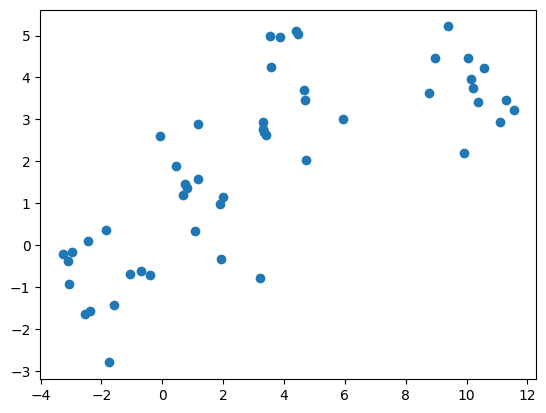

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

Penjelasan :


---

Perintah plt.scatter(X1[:, 0], X1[:, 1], marker='o') membuat scatter plot dengan titik data dari kolom pertama dan kedua X1, menggunakan marker berbentuk lingkaran.

---


#D. Agglomerative Clustering

In [4]:
single_linkage = AgglomerativeClustering(n_clusters=4, linkage='single')
y_single = single_linkage.fit_predict(X1)

average_linkage = AgglomerativeClustering(n_clusters=4, linkage='average')
y_average = average_linkage.fit_predict(X1)

Penjelasan :


---

Perintah single_linkage = AgglomerativeClustering(n_clusters=4, linkage='single') digunakan untuk melakukan clustering hierarkis pada data X1 dengan metode single linkage, di mana penggabungan dua cluster didasarkan pada jarak terdekat antara elemen-elemen dalam kedua cluster. Dengan parameter n_clusters=4, hasilnya akan membagi data menjadi 4 cluster. Fungsi fit_predict(X1) kemudian digunakan untuk menerapkan model ini ke data dan menghasilkan label cluster (y_single) untuk setiap titik data.

Sementara itu, perintah average_linkage = AgglomerativeClustering(n_clusters=4, linkage='average') menggunakan metode average linkage, yang menggabungkan cluster berdasarkan rata-rata jarak antara elemen-elemen di kedua cluster. Sama seperti pada metode single linkage, fungsi fit_predict(X1) akan memberikan label cluster (y_average) sesuai dengan pengelompokan yang dihasilkan oleh metode rata-rata.

---


Single Linkage

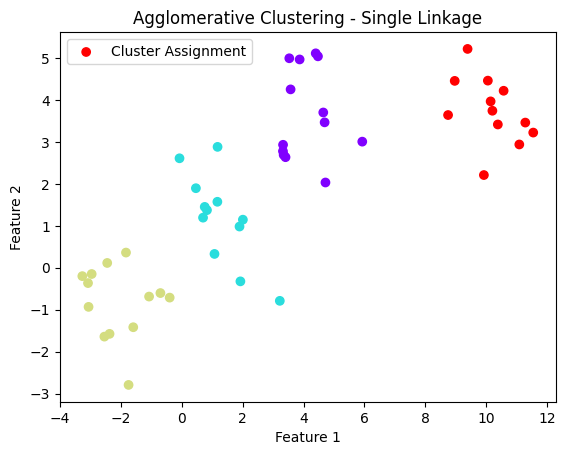

In [5]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_single, cmap='rainbow', marker='o', label='Single Linkage')
plt.title("Agglomerative Clustering - Single Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Cluster Assignment"])
plt.show()

Penjelasan :


---

Membuat scatter plot dari data X1 dengan warna titik berdasarkan label cluster y_single dari metode single linkage dengan menggunakan skema warna rainbow.

---




Average Linkage

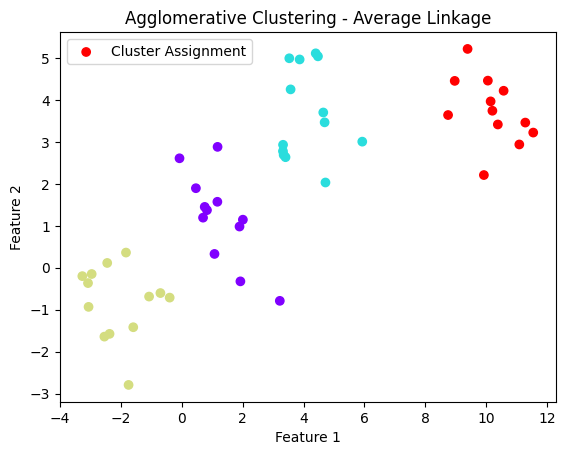

In [7]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_average, cmap='rainbow', marker='o', label='Average Linkage')
plt.title("Agglomerative Clustering - Average Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(["Cluster Assignment"])
plt.show()

Penjelasan :


---

di atas membuat scatter plot dari data X1 dengan warna titik berdasarkan label cluster y_average dari metode average linkage.

---


#E. Plotting Dendrogram

In [9]:
dist_matrix = distance_matrix(X1, X1)
print(dist_matrix)

[[ 0.         13.7408067   9.29303815 ... 14.04914346 10.31342567
   9.6755883 ]
 [13.7408067   0.          4.47506754 ...  0.31137502  3.99245574
   4.08286453]
 [ 9.29303815  4.47506754  0.         ...  4.7786245   1.61943224
   0.39600077]
 ...
 [14.04914346  0.31137502  4.7786245  ...  0.          4.25308519
   4.38729992]
 [10.31342567  3.99245574  1.61943224 ...  4.25308519  0.
   1.53000432]
 [ 9.6755883   4.08286453  0.39600077 ...  4.38729992  1.53000432
   0.        ]]


Penjelasan:


---

di atas menghitung jarak antar setiap pasangan titik dalam data X1 menggunakan metrik Euclidean. Hasilnya disimpan dalam dist_matrix, yang merupakan matriks simetris berukuran (n_samples, n_samples), di mana setiap elemen menunjukkan jarak antara dua titik data.

---




In [10]:
X = hierarchy.linkage(dist_matrix, 'single')
Y = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-10-7e9a5415d43d>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-10-7e9a5415d43d>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')


Penjelasan:


---

hierarchy.linkage(dist_matrix, 'average') melakukan clustering hierarkis pada matriks jarak dist_matrix menggunakan dua metode linkage yang berbeda.
Single linkage (disimpan di X) menggabungkan dua cluster berdasarkan jarak terdekat antar titik data.
Lalu, Average linkage (disimpan di Y) menggabungkan cluster berdasarkan rata-rata jarak antar elemen di kedua cluster.

---

#a. Dendrogram Parameter X (Single)

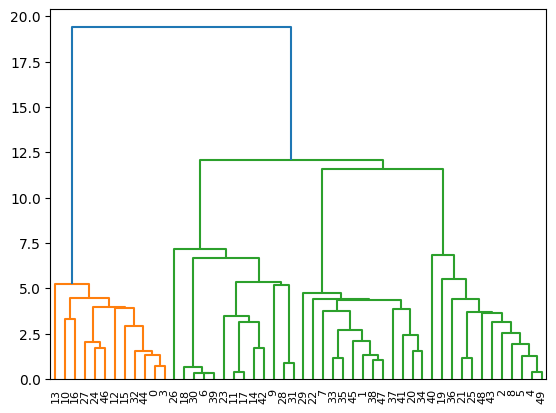

In [11]:
dendro = hierarchy.dendrogram(X)

Penjelasan:


---

di atas untuk memvisualisasikan dendrogram dari hasil single linkage, yang menunjukkan penggabungan cluster secara hierarkis berdasarkan jarak antar cluster.

---

#b. Dendrogram Parameter Y (Average)

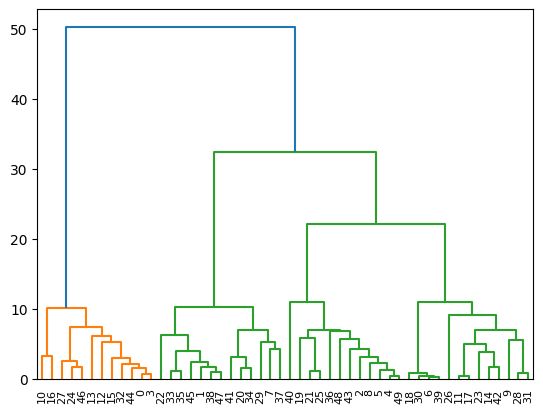

In [12]:
dendro2 = hierarchy.dendrogram(Y)

Penjelasan:


---

di atas untuk memvisualisasikan dendrogram berdasarkan hasil average linkage, menampilkan proses penggabungan cluster secara hierarkis berdasarkan rata-rata jarak antar elemen dalam cluster.

---

#**PENJELASAN PERBEDAAN**


---


Single Linkage:

Menggabungkan dua cluster berdasarkan jarak terdekat antara anggota cluster yang berbeda. Yang berarti jarak yang digunakan untuk menggabungkan dua cluster adalah jarak terkecil antara satu titik di cluster pertama dan satu titik di cluster kedua.
Secara visual, single linkage cenderung menghasilkan cluster yang lebih terhubung tetapi bisa lebih tersebar atau terpisah dengan jarak lebih jauh.

Average Linkage:

Menggabungkan dua cluster berdasarkan rata-rata jarak antara semua pasangan titik yang ada di kedua cluster. Dengan kata lain, jarak antar cluster dihitung sebagai rata-rata semua jarak antar titik di kedua cluster.
Secara visual, average linkage cenderung memberikan pengelompokan yang lebih seragam dan lebih kompak, karena memperhitungkan seluruh jarak antar titik.




---



#**2. Agglomerative Clustering Menggunakan Scipy dan Scikit-learn dengan Single Linkage dan Average Linkage untuk Dataset cars_clustering.csv**

#A. Import Dataset

In [14]:
filename = 'cars_clus.csv'
pdf = pd.read_csv(filename)
print("Shape of dataset", pdf.shape)

pdf.head(5)

Shape of dataset (159, 16)


manufact    model   sales  resale type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919   16.36    0    21.5      1.8      140    101.2   
1    Acura       TL  39.384  19.875    0    28.4      3.2      225    108.1   
2    Acura       CL  14.114  18.225    0  $null$      3.2      225    106.9   
3    Acura       RL   8.588  29.725    0      42      3.5      210    114.6   
4     Audi       A4  20.397  22.255    0   23.99      1.8      150    102.6   

  width length curb_wgt fuel_cap mpg lnsales  partition  
0  67.3  172.4    2.639     13.2  28   2.828          0  
1  70.3  192.9    3.517     17.2  25   3.673          0  
2  70.6    192     3.47     17.2  26   2.647          0  
3  71.4  196.6     3.85       18  22    2.15          0  
4  68.2    178    2.998     16.4  27   3.015          0

Penjelasan:


---

di atas digunakan untuk membaca file CSV bernama 'cars_clus.csv' menggunakan pustaka pandas di Python. Setelah file dibaca, informasi mengenai dimensi dataset, berupa jumlah baris dan kolom, ditampilkan dengan pdf.shape. Kemudian, untuk melihat beberapa data awal dalam dataset, digunakan pdf.head(5), yang menampilkan lima baris pertama dari dataset.

---




#B. Data Cleaning

In [15]:
print("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
      'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
      'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0  
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0  
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0  
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0  
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933          0

Penjelasan:


---

di atas mengubah kolom tertentu menjadi tipe data numerik, menghapus baris yang memiliki nilai NaN, dan mereset indeks dataset. Ukuran dataset ditampilkan sebelum dan setelah pembersihan untuk melihat perubahan.

---


#C. Feature Selection

In [16]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
print(featureset.head(5))

   engine_s  horsepow  wheelbas  width  length  curb_wgt  fuel_cap   mpg
0       1.8     140.0     101.2   67.3   172.4     2.639      13.2  28.0
1       3.2     225.0     108.1   70.3   192.9     3.517      17.2  25.0
2       3.5     210.0     114.6   71.4   196.6     3.850      18.0  22.0
3       1.8     150.0     102.6   68.2   178.0     2.998      16.4  27.0
4       2.8     200.0     108.7   76.1   192.0     3.561      18.5  22.0


Penjelasan:


---

memilih beberapa kolom tertentu sebagai fitur dan menampilkan lima baris pertama dari fitur tersebut.

---


#D. Normalisasi

In [17]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

Penjelasan:


---

di atas untuk menormalisasi fitur dengan MinMaxScaler agar nilai-nya berada dalam rentang 0 hingga 1.

---


#E. Clustering dengan Scipy

#a. Menghitung matriks jarak

In [18]:
import scipy

leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

Penjelasan:


---

menghitung dan menyimpan jarak Euclidean antara setiap pasangan data dalam feature_mtx ke dalam matriks D.

---


#b. hierarchical clustering

In [19]:
import pylab
import scipy
import scipy.cluster.hierarchy
Z_single = hierarchy.linkage(D, 'single')
Z_average = hierarchy.linkage(D, 'average')

<ipython-input-19-517f28bfc003>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_single = hierarchy.linkage(D, 'single')
<ipython-input-19-517f28bfc003>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_average = hierarchy.linkage(D, 'average')


Penjelasan:


---

di atas untuk clustering hierarkis pada matriks jarak D menggunakan metode 'single' dan 'average', kemudian menyimpan hasilnya dalam Z_single dan Z_average.

---


#c. memotong dendrogram berdasarkan jarak tertentu

Single

In [20]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters_single = fcluster(Z_single, max_d, criterion='distance')
clusters_single

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

Penjelasan:


---

mengelompokkan data menggunakan hasil clustering single dengan memotong dendrogram pada jarak maksimum 3, dan menyimpan hasilnya dalam clusters_single.

---


Average

In [21]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters_average = fcluster(Z_average, max_d, criterion='distance')
clusters_average

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

Penjelasan:


---

mengelompokkan data menggunakan hasil clustering 'average' dengan memotong dendrogram pada jarak maksimum 3, dan menyimpan hasil pengelompokan dalam variabel clusters_average.

---


#d. memotong dendrogram berdasarkan jumlah cluster tertentu

Single

In [22]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters_single = fcluster(Z_single, k, criterion='maxclust')
clusters_single

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

Penjelasan:


---

mengelompokkan data menggunakan hasil clustering single dengan memotong dendrogram untuk membentuk 5 cluster, yang ditentukan oleh parameter k. Fungsi fcluster digunakan dengan kriteria maxclust untuk memastikan jumlah cluster yang dihasilkan adalah 5, dan hasilnya disimpan dalam variabel clusters_single.

---


Average

In [23]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters_average = fcluster(Z_average, k, criterion='maxclust')
clusters_average

array([2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2,
       5, 4, 4, 4, 4, 4, 2, 4, 4, 1, 1, 1, 1, 3, 4, 2, 4, 4, 4, 3, 4, 3,
       1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 1, 2, 4, 4, 2, 2], dtype=int32)

Penjelasan:


---

mengelompokkan data berdasarkan hasil clustering 'average' dengan membentuk 5 cluster, sesuai nilai k. Menggunakan fungsi fcluster dengan kriteria maxclust, kode ini memastikan hasil pengelompokan terdiri dari tepat 5 cluster, yang disimpan dalam variabel clusters_average.

---


#e. Plotting Dendrogram

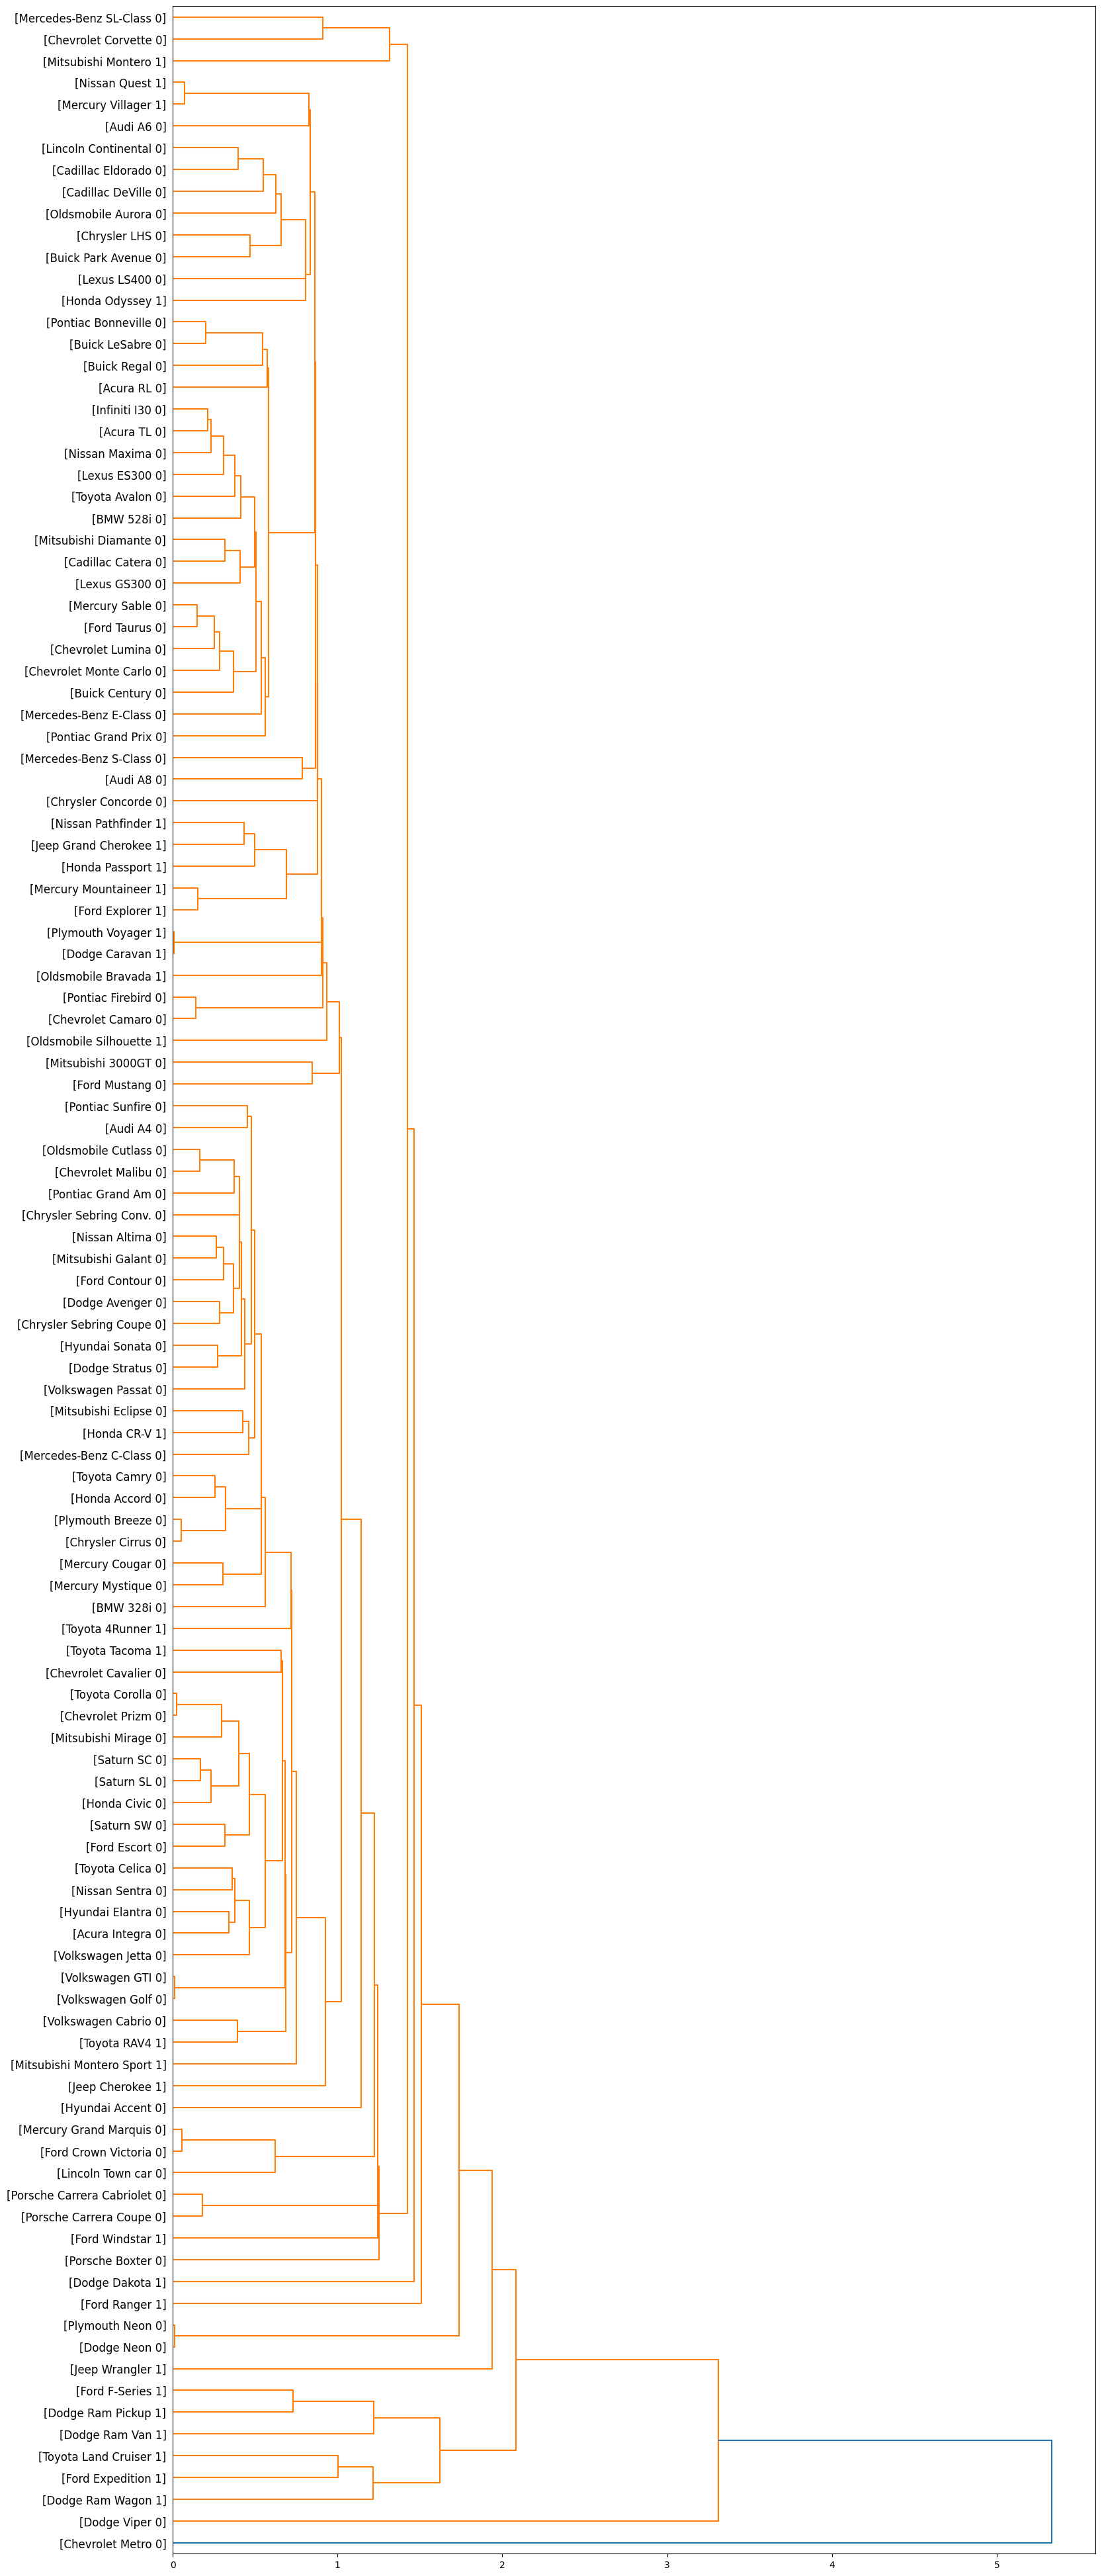

In [24]:
fig = pylab.figure(figsize=(18,50))
def lif(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

dendro = hierarchy.dendrogram(Z_single, leaf_label_func=lif, leaf_rotation=0, leaf_font_size =12, orientation='right')

Penjelasan:


---

di atas menggambar dendrogram hasil clustering single dengan label daun yang menampilkan informasi merek, model, dan tipe kendaraan.

---


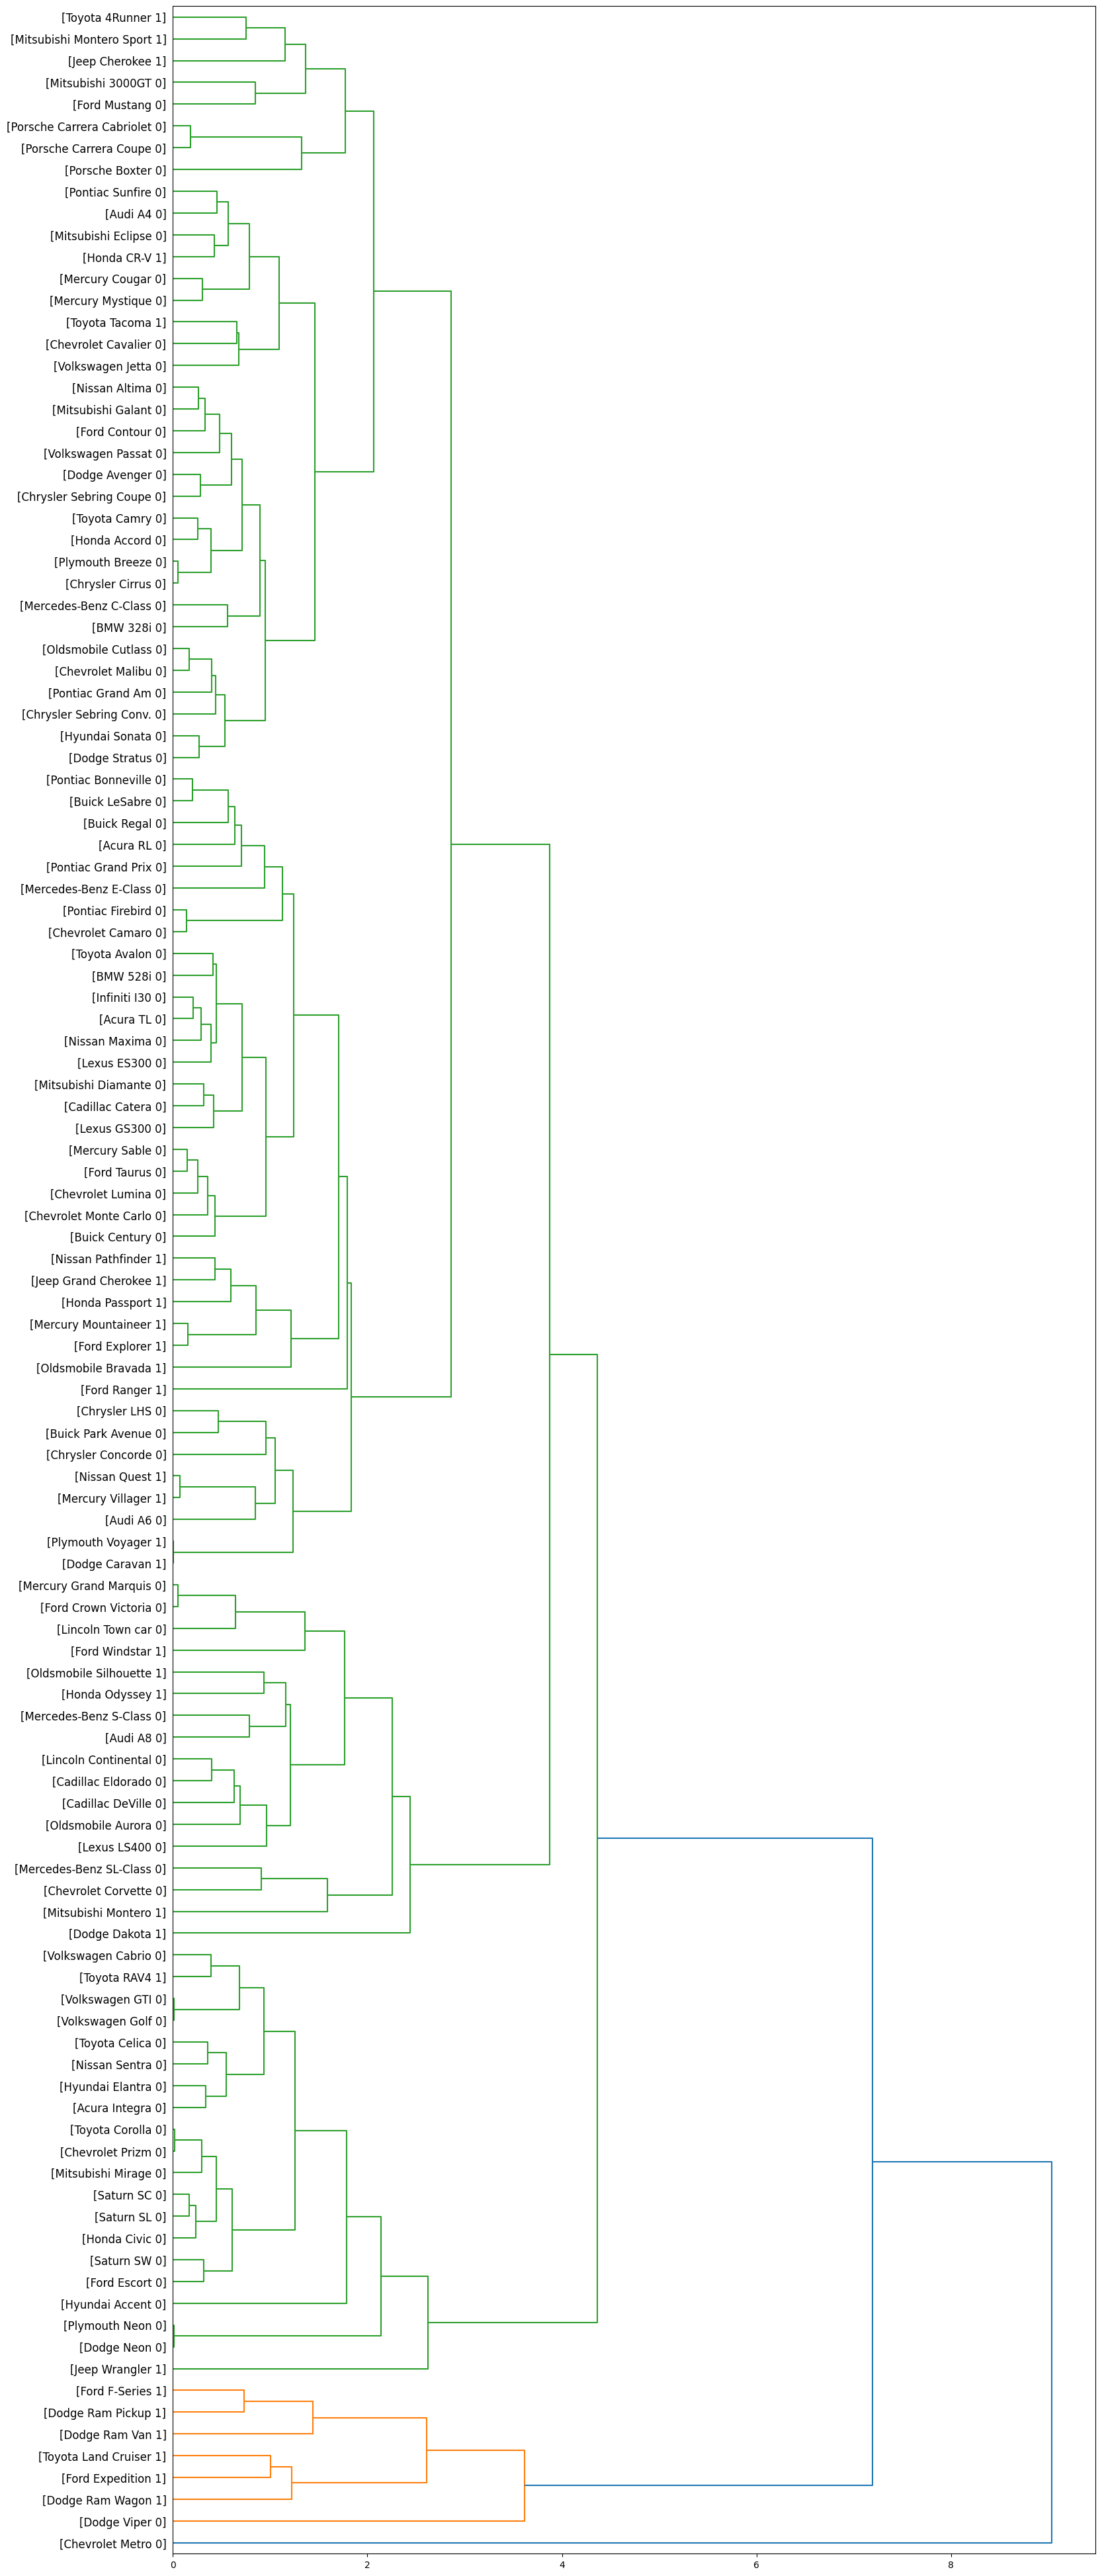

In [25]:
fig = pylab.figure(figsize=(18,50))
def lif(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

dendro = hierarchy.dendrogram(Z_average, leaf_label_func=lif, leaf_rotation=0, leaf_font_size =12, orientation='right')

Penjelasan:


---

di atas menggambar dendrogram dari clustering 'average' dengan label daun yang menampilkan merek, model, dan tipe kendaraan.

---


In [26]:
dist_matrix = distance_matrix(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


Penjelasan:


---

menghitung matriks jarak antara setiap pasangan data dalam feature_mtx menggunakan fungsi distance_matrix. Hasilnya adalah matriks yang berisi jarak antar semua data, yang kemudian ditampilkan menggunakan print.

---


#F. Clustering dengan Scikit-learn

#a. Agglomerative Clustering - Scikit-learn

In [27]:
single = AgglomerativeClustering(n_clusters=6, linkage='single')
single.fit(feature_mtx)
print("Labels dengan Single Linkage (Scikit-learn):")
print(single.labels_)

Labels dengan Single Linkage (Scikit-learn):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 5 1 4 2 0 0
 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0]


Penjelasan:


---

Kode di atas untuk clustering aglomeratif dengan 6 cluster menggunakan metode 'single linkage' dari scikit-learn. Fungsi fit digunakan untuk mengelompokkan data dalam feature_mtx, dan hasilnya, berupa label cluster untuk setiap data, ditampilkan menggunakan print.

---


In [28]:
average = AgglomerativeClustering(n_clusters=6, linkage='average')
average.fit(feature_mtx)
print("\nLabels dengan Average Linkage (Scikit-learn):")
print(average.labels_)


Labels dengan Average Linkage (Scikit-learn):
[0 4 4 0 4 4 0 4 4 4 4 4 4 4 4 0 0 4 4 4 1 0 3 0 0 4 0 4 0 0 0 1 5 2 2 4 4
 0 4 0 4 4 4 4 2 4 5 0 0 0 4 4 0 0 0 4 0 0 4 4 4 4 4 4 0 0 0 4 0 4 0 0 0 4
 4 4 4 0 4 4 1 0 0 4 4 4 0 4 4 4 0 0 4 0 0 4 4 4 0 0 0 0 0 0 0 0 4 0 0 0 0
 2 0 0 0 0 0]


Penjelasan:


---

di atas untuk clustering aglomeratif dengan 6 cluster menggunakan metode 'average linkage' dari scikit-learn. Fungsi fit digunakan untuk mengelompokkan data dalam feature_mtx, dan hasil pengelompokan, berupa label cluster untuk setiap data, kemudian ditampilkan dengan print.

---


#b. Single-Linkage

In [29]:

pdf['cluster_'] = single.labels_
pdf.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933          0   

   cluster_  
0         0  
1         0  
2         0  
3         0  
4         0

Penjelasan:


---

menambahkan hasil label cluster dari metode clustering single ke dalam dataset pdf sebagai kolom baru bernama cluster_. Kemudian, lima baris pertama dari dataset yang sudah diperbarui ditampilkan untuk memeriksa data dan kolom baru tersebut.

---


<ipython-input-30-1c5fe3b40ab9>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

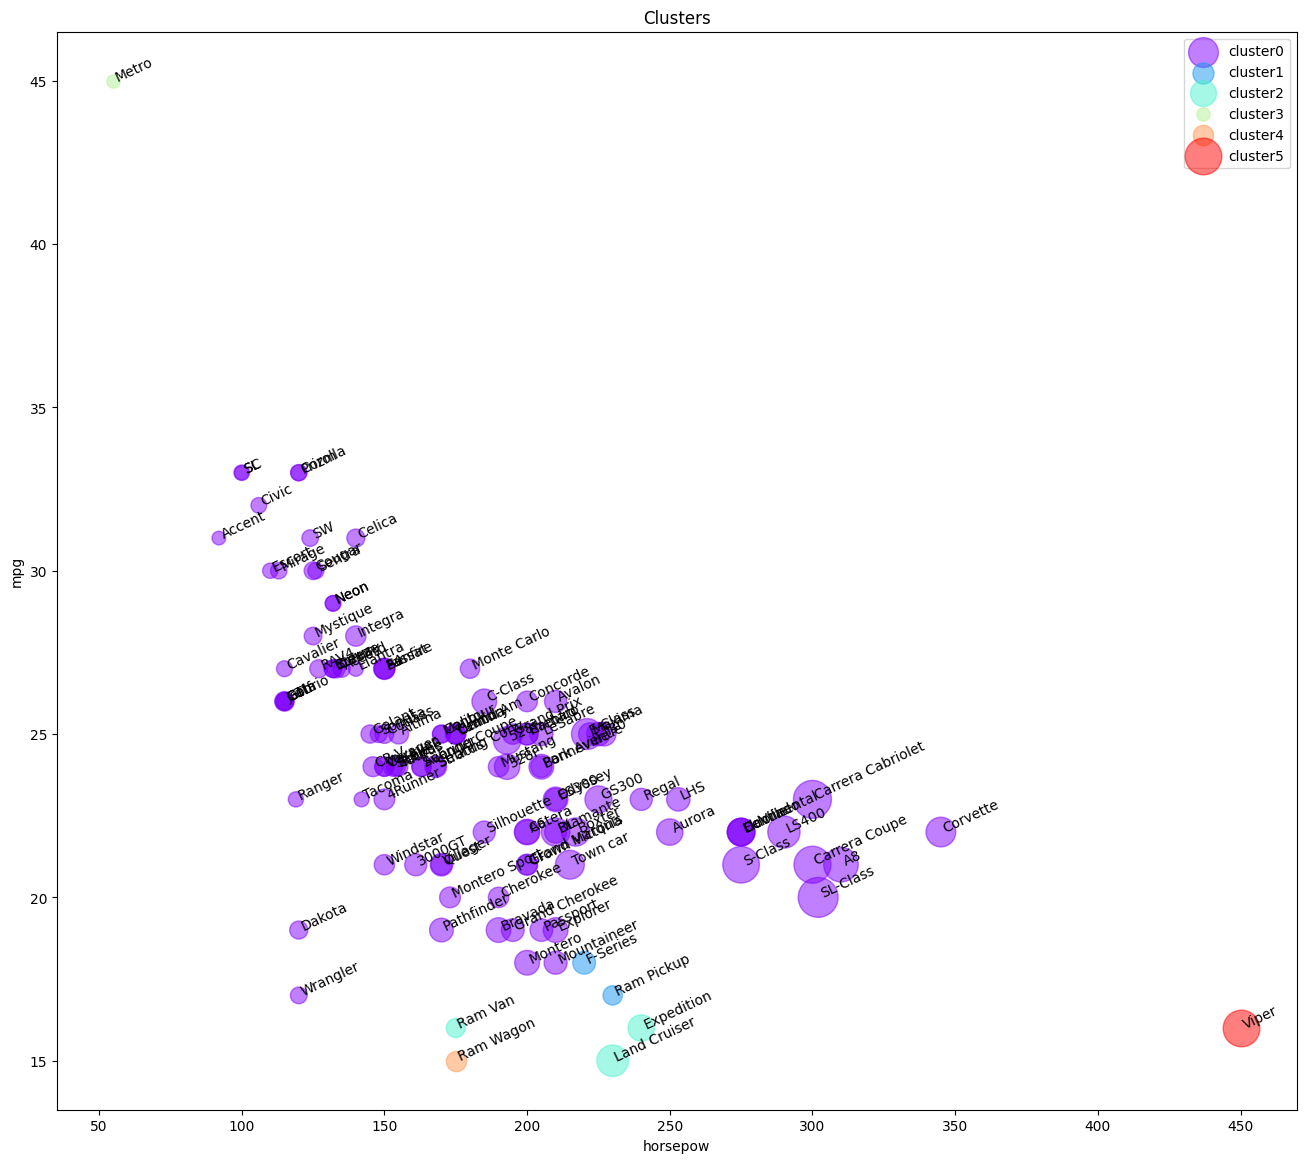

In [30]:
import matplotlib.cm as cm

n_clusters = max(single.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
    plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)


plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Penjelasan:


---

membuat visualisasi scatter plot untuk setiap cluster yang dihasilkan oleh metode clustering single. Setiap cluster diberi warna berbeda menggunakan palet rainbow, dan ukuran titik dalam plot ditentukan berdasarkan harga kendaraan (price). Nama model kendaraan ditampilkan di dekat setiap titik, dengan rotasi teks untuk keterbacaan. Grafik ini menggambarkan hubungan antara 'horsepow' (daya mesin) dan 'mpg' (efisiensi bahan bakar) untuk setiap cluster, lengkap dengan legenda dan label sumbu.

---


In [31]:
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

Penjelasan:


---

mengelompokkan dataset pdf berdasarkan kolom cluster_ dan type, lalu menghitung jumlah data dalam setiap kombinasi cluster dan tipe kendaraan. Hasilnya menunjukkan distribusi jumlah kendaraan berdasarkan cluster dan tipe yang terlibat.

---


In [32]:
agg_cars = pdf.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

Penjelasan:


---

menghitung rata-rata 'horsepow', 'engine_s', 'mpg', dan 'price' untuk setiap kombinasi cluster dan tipe kendaraan, dan menyimpannya dalam tabel agg_cars.

---




<ipython-input-33-66b777bd4c68>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-33-66b777bd4c68>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

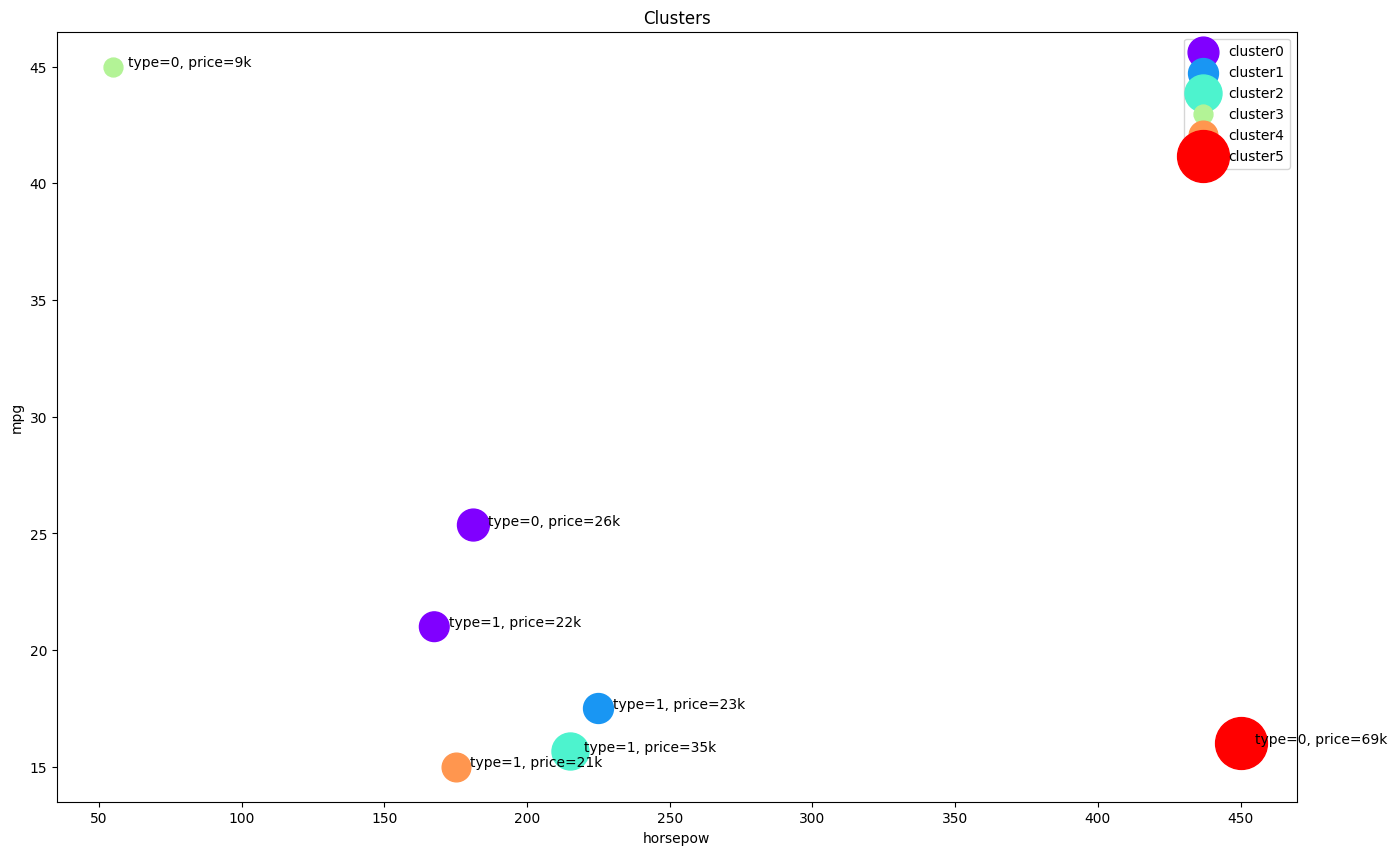

In [33]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_cars.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Penjelasan:


---

membuat scatter plot yang menampilkan rata-rata 'horsepow' dan 'mpg' untuk setiap cluster, dengan ukuran titik berdasarkan harga dan warna mewakili cluster. Informasi tipe kendaraan dan harga juga ditambahkan di dekat setiap titik.

---


#c. Average-Linkage

In [34]:
pdf['cluster_'] = average.labels_
pdf.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933          0   

   cluster_  
0         0  
1         4  
2         4  
3         0  
4         4

Penjelasan:


---

menambahkan label cluster dari clustering 'average' ke dalam kolom cluster_ pada dataset pdf dan menampilkan lima baris pertama.

---


<ipython-input-35-a6a856a92251>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

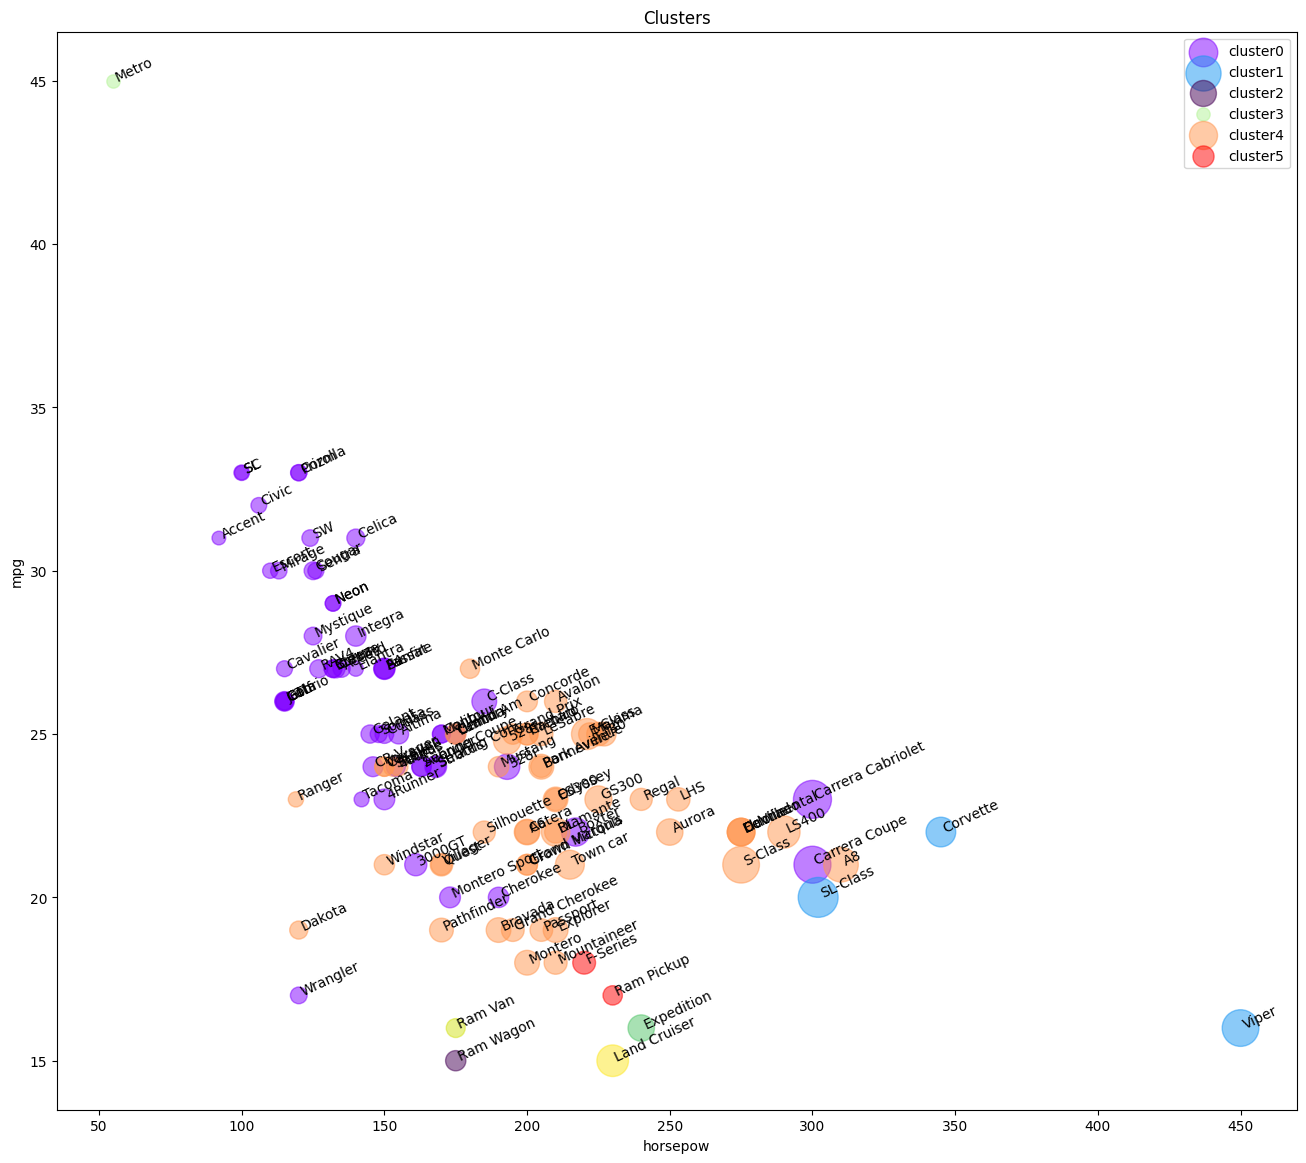

In [35]:
import matplotlib.cm as cm

n_clusters = max(average.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
    plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)


plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Penjelasan:


---

membuat scatter plot untuk setiap cluster hasil clustering 'average', dengan warna berbeda untuk setiap cluster, ukuran titik berdasarkan harga, dan label model kendaraan yang ditampilkan dekat titik.

---


In [36]:
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

Penjelasan:


---

mengelompokkan dataset pdf berdasarkan kolom cluster_ dan type, lalu menghitung jumlah kendaraan di setiap kombinasi cluster dan tipe. Hasilnya menunjukkan distribusi jumlah data berdasarkan pengelompokan tersebut.

---


In [37]:
agg_cars = pdf.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

Penjelasan:


---

menghitung rata-rata 'horsepow', 'engine_s', 'mpg', dan 'price' untuk setiap kombinasi cluster dan tipe kendaraan, kemudian menyimpannya dalam tabel agg_cars.

---


<ipython-input-38-66b777bd4c68>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-38-66b777bd4c68>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

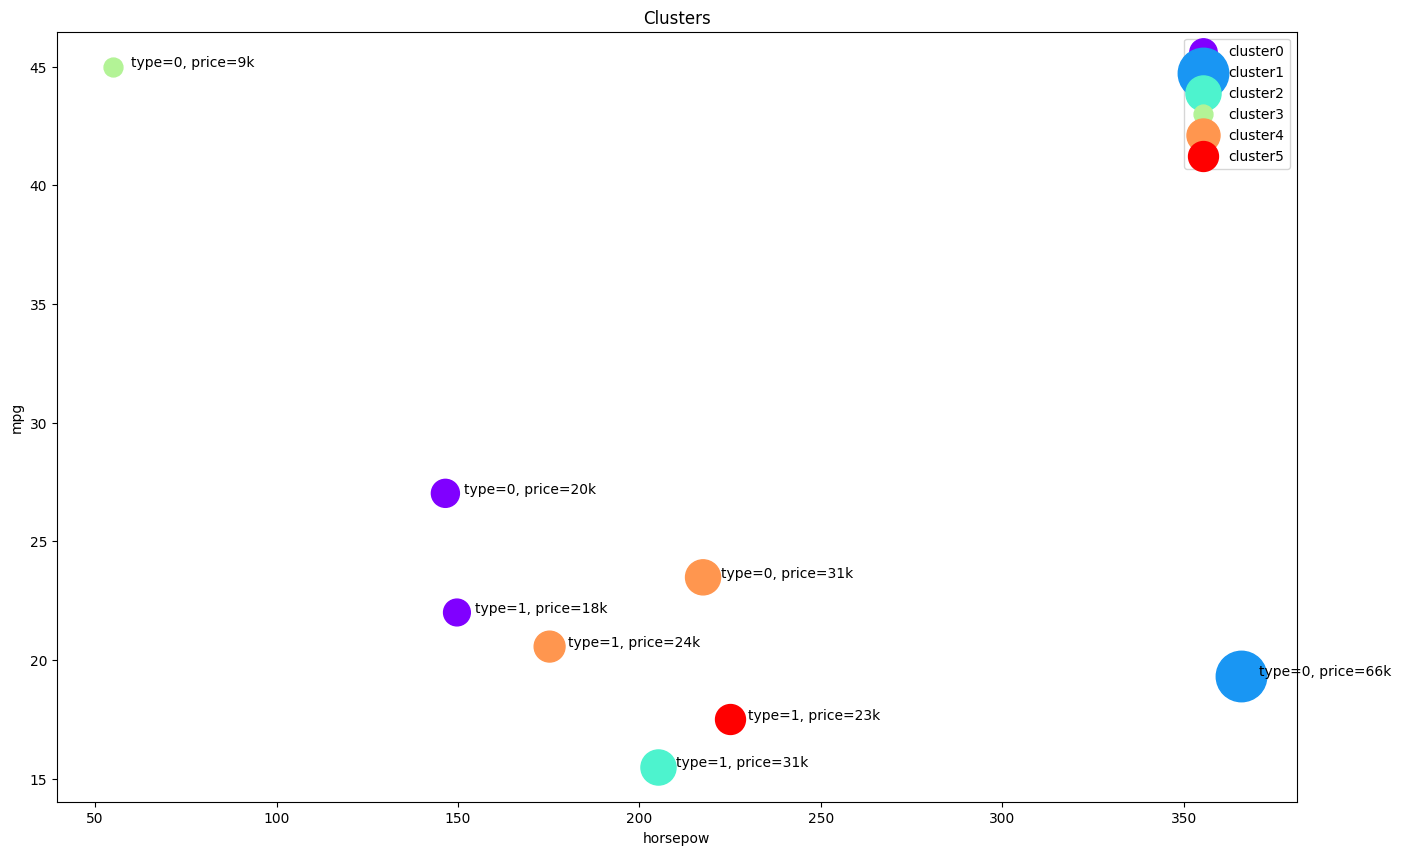

In [38]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_cars.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Penjelasan:


---

membuat scatter plot untuk rata-rata 'horsepow' dan 'mpg' per cluster, dengan ukuran titik berdasarkan harga, warna membedakan cluster, dan informasi tipe serta harga kendaraan ditampilkan di dekat titik.

---


#**PENJELASAN PERBEDAAN**

---

**Berdasarkan Scipy dan Scikit-learn**

Scipy

agglomerative clustering dilakukan dengan menggunakan fungsi linkage(), yang menghasilkan hasil clustering dalam bentuk dendrogram. Proses penggabungan antar cluster dilakukan secara hierarkis, dan hasilnya menunjukkan urutan penggabungan antar cluster serta jarak di mana penggabungan tersebut terjadi.

Scikit-learn

agglomerative clustering lebih berfokus pada aplikasi langsung clustering dengan menghasilkan labels untuk data yang dikelompokkan. Fungsi AgglomerativeClustering() memudahkan Anda untuk melakukan clustering pada data dan mendapatkan hasil label cluster tanpa harus menangani struktur dendrogram secara langsung.

---

**Berdasarkan single linkage dan average linkage dengan cars_clustering :**

Single Linkage

menggabungkan dua cluster berdasarkan jarak terdekat antara elemen-elemen dari kedua cluster. Artinya, jika ada dua kendaraan dengan fitur yang sangat mirip (misalnya, daya mesin atau efisiensi bahan bakar), meskipun kendaraan lainnya dalam cluster tersebut mungkin sangat berbeda, cluster tersebut tetap akan digabungkan. Ini dapat menghasilkan cluster dengan bentuk yang lebih panjang

Average Linkage

menggabungkan dua cluster berdasarkan rata-rata jarak antara semua pasangan elemen dalam kedua cluster. Dengan kata lain, meskipun satu kendaraan dalam cluster memiliki fitur yang sangat mirip dengan kendaraan dari cluster lain, jika rata-rata jaraknya cukup besar, maka kedua cluster tersebut tidak akan digabungkan.

---

#**3. Agglomerative Clustering Menggunakan Scipy dan Scikit-learn dengan Single Linkage, Average Linkage dan Complete Linkage untuk Dataset Iris**

#A. Import Dataset



In [39]:
import pandas as panda
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
pdf = panda.read_csv(url, names=names)

In [41]:
print(pdf.shape)
print(pdf.head(5))

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


#B. Data Cleaning

In [42]:
print("Shape of dataset before cleaning: ", pdf.size)

pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  750
Shape of dataset after cleaning:  750


sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Penjelasan:


---

di atas menghapus baris dengan nilai kosong (NaN) dari dataset, mereset indeks, dan menampilkan ukuran serta lima baris pertama setelah cleaning.

---

#C. Feuture Selection

In [43]:
featureset = pdf[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
target = pdf['Class']
print(featureset.head(5))

   sepal-length  sepal-width  petal-length  petal-width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


Penjelasan:


---

Di atas memilih empat kolom fitur ('sepal-length', 'sepal-width', 'petal-length', 'petal-width') dari dataset pdf dan menyimpannya dalam variabel featureset, serta memilih kolom target ('Class') sebagai variabel target. Kemudian, kode menampilkan lima baris pertama dari featureset untuk melihat data yang dipilih.

---

#D. Normalisasi

In [44]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]


array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

Penjelasan:


---

Di atas melakukan normalisasi pada data fitur menggunakan MinMaxScaler dari scikit-learn. Data pada featureset diubah ke dalam rentang nilai antara 0 dan 1 dengan fit_transform(), lalu hasilnya disimpan dalam feature_mtx. Kemudian, lima baris pertama dari hasil normalisasi ditampilkan untuk memeriksa perubahan tersebut.

---

#E. Clustering dengan Scipy

#a. Menghitung matriks jarak

In [45]:
import scipy

leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

Penjelasan:


---

Di atas menghitung jarak Euclidean antar setiap pasangan data dalam feature_mtx dan menyimpannya dalam matriks jarak D. Dengan menggunakan scipy.spatial.distance.euclidean, perulangan dilakukan untuk setiap kombinasi pasangan data, sehingga setiap elemen D[i,j] berisi jarak antara titik data ke-i dan titik data ke-j. Matriks jarak ini kemudian dapat digunakan untuk analisis lebih lanjut seperti clustering.

---

#b. hierarchical clustering

In [46]:
import pylab
import scipy
import scipy.cluster.hierarchy
Z_single = hierarchy.linkage(D, 'single')
Z_complete = hierarchy.linkage(D, 'complete')
Z_average = hierarchy.linkage(D, 'average')

<ipython-input-46-23a4bd40ffac>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_single = hierarchy.linkage(D, 'single')
<ipython-input-46-23a4bd40ffac>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_complete = hierarchy.linkage(D, 'complete')
<ipython-input-46-23a4bd40ffac>:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_average = hierarchy.linkage(D, 'average')


Penjelasan:


---

Di atas menghitung linkage matrix untuk clustering menggunakan tiga metode: single, complete, dan average, berdasarkan matriks jarak D, yang akan digunakan untuk mengelompokkan data.

---

#c. Memotong dendrogram berdasarkan jarak tertentu

Single

In [47]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters_single = fcluster(Z_single, max_d, criterion='distance')
clusters_single

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Penjelasan:


---

Di atas menggunakan fcluster untuk membentuk cluster dari Z_single dengan jarak maksimum 3, menghasilkan label cluster untuk setiap data.

---

Complete

In [48]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters_complete = fcluster(Z_complete, max_d, criterion='distance')
clusters_complete

array([3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 6, 4, 6, 4, 5, 4, 6, 5, 4, 6, 4, 6, 4,
       4, 6, 4, 6, 4, 4, 4, 4, 4, 4, 4, 9, 4, 6, 6, 6, 6, 4, 4, 4, 4, 4,
       6, 6, 6, 4, 6, 5, 6, 6, 6, 4, 5, 6, 8, 4, 8, 9, 9, 7, 4, 8, 9, 7,
       9, 9, 9, 4, 9, 9, 9, 7, 7, 4, 8, 4, 7, 4, 9, 8, 4, 4, 9, 8, 8, 7,
       9, 4, 4, 7, 8, 9, 4, 9, 8, 9, 4, 8, 8, 9, 9, 9, 9, 4], dtype=int32)

Penjelasan:


---

Di atas menggunakan fcluster untuk membentuk cluster dari linkage matrix Z_complete dengan jarak maksimum 3. Hasilnya yaitu label cluster untuk setiap data, yang dipisahkan berdasarkan kriteria jarak tersebut.

---

Average

In [49]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters_average = fcluster(Z_average, max_d, criterion='distance')
clusters_average

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3], dtype=int32)

Penjelasan:


---

Di atas menggunakan fcluster untuk mengelompokkan data berdasarkan linkage matrix Z_average dengan jarak maksimum 3. Setiap data kemudian diberi label cluster sesuai dengan kriteria jarak tersebut.

---

#d. Memotong dendrogram berdasarkan jumlah cluster tertentu

single

In [50]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters_single = fcluster(Z_single, k, criterion='maxclust')
clusters_single

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Penjelasan:


---

Di atas menggunakan fcluster untuk mengelompokkan data menjadi 5 cluster berdasarkan linkage matrix Z_single, dengan kriteria jumlah cluster maksimum (maxclust). Hasilnya adalah label cluster untuk setiap data, yang dibagi ke dalam 5 kelompok berdasarkan struktur hierarki.

---

complete

In [51]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters_complete = fcluster(Z_complete, k, criterion='maxclust')
clusters_complete

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 5, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 5, 2, 5, 5, 5, 4, 2, 5, 5, 4,
       5, 5, 5, 2, 5, 5, 5, 4, 4, 2, 5, 2, 4, 2, 5, 5, 2, 2, 5, 5, 5, 4,
       5, 2, 2, 4, 5, 5, 2, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2], dtype=int32)

Penjelasan:


---

Di atas mengelompokkan data menjadi 5 cluster dari linkage matrix Z_complete menggunakan kriteria jumlah cluster maksimum.

---

average

In [52]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters_average = fcluster(Z_average, k, criterion='maxclust')
clusters_average

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 5, 4, 5, 4, 5, 4, 5, 5, 4, 5, 4, 5, 4,
       4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4,
       5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 2, 4, 2, 4, 2, 3, 4, 2, 2, 3,
       4, 4, 2, 4, 2, 2, 4, 3, 3, 4, 2, 4, 3, 4, 2, 2, 4, 4, 2, 2, 2, 3,
       2, 4, 4, 3, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4], dtype=int32)

Penjelasan:


---

 Di atas membagi data menjadi 5 cluster dari linkage matrix Z_average menggunakan kriteria jumlah cluster maksimum.

---

#e. Plotting Dendrogram

Single

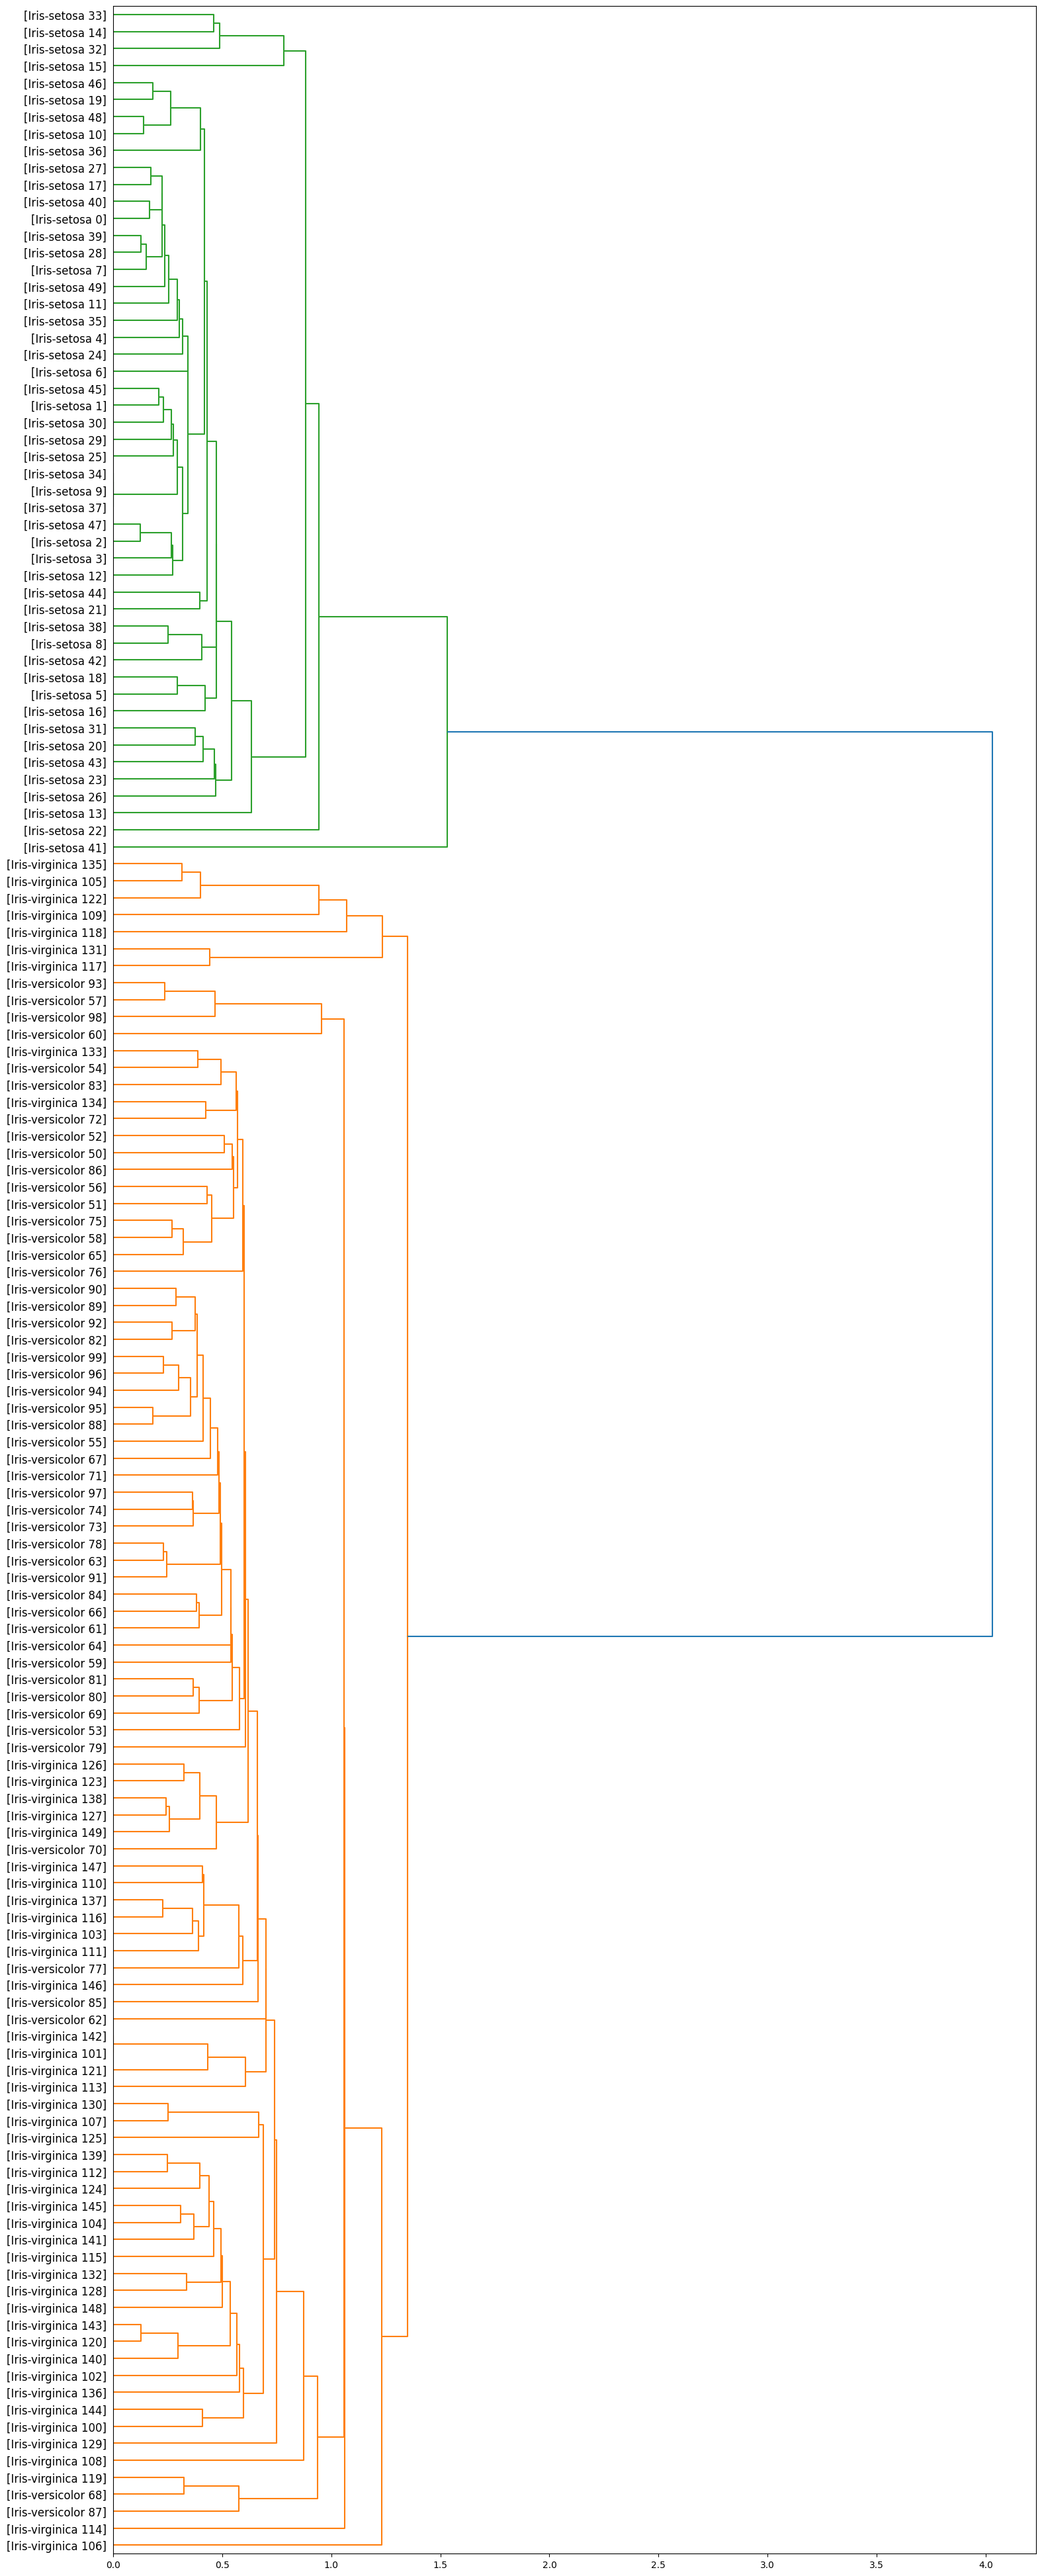

In [53]:
fig = plt.figure(figsize=(18, 50))
def llf(id):
    return '[%s %s]' % (pdf['Class'][id], id)

dendro = hierarchy.dendrogram(Z_single, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')
plt.show()

Penjelasan:


---

Di atas membuat dendrogram dengan metode single linkage, menampilkan label yang mencakup jenis spesies dan indeks data, lalu menampilkan diagram tersebut.

---

Complete

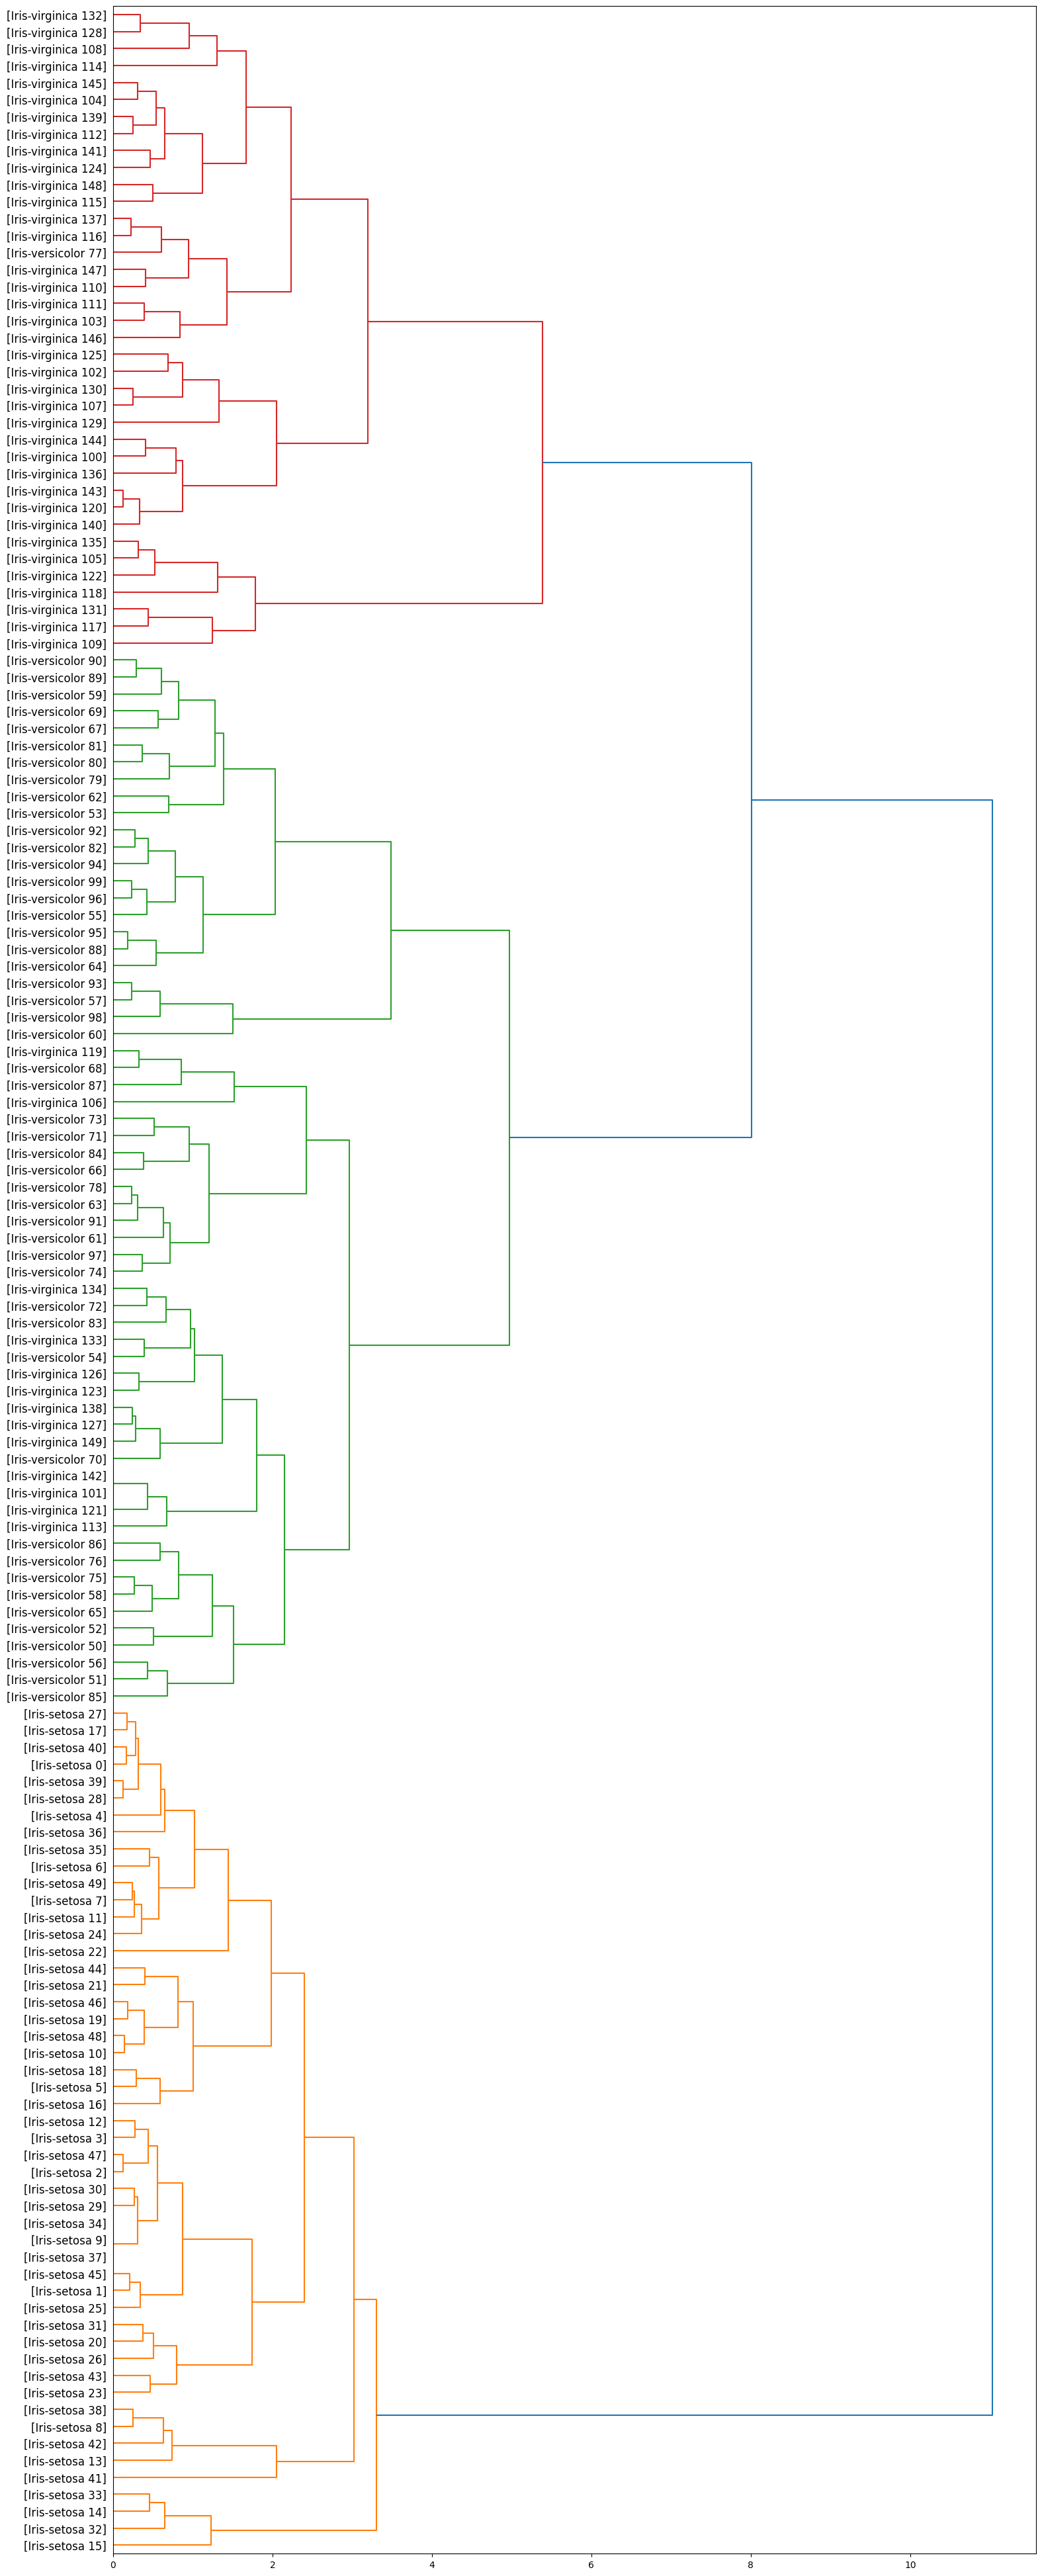

In [54]:
fig = plt.figure(figsize=(18, 50))
def llf(id):
    return '[%s %s]' % (pdf['Class'][id], id)

dendro = hierarchy.dendrogram(Z_complete, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')
plt.show()

Penjelasan:


---

Di atas membuat dendrogram dengan complete linkage, menampilkan label kelas spesies dan indeks data, kemudian menampilkannya dengan orientasi kanan.

---

Average

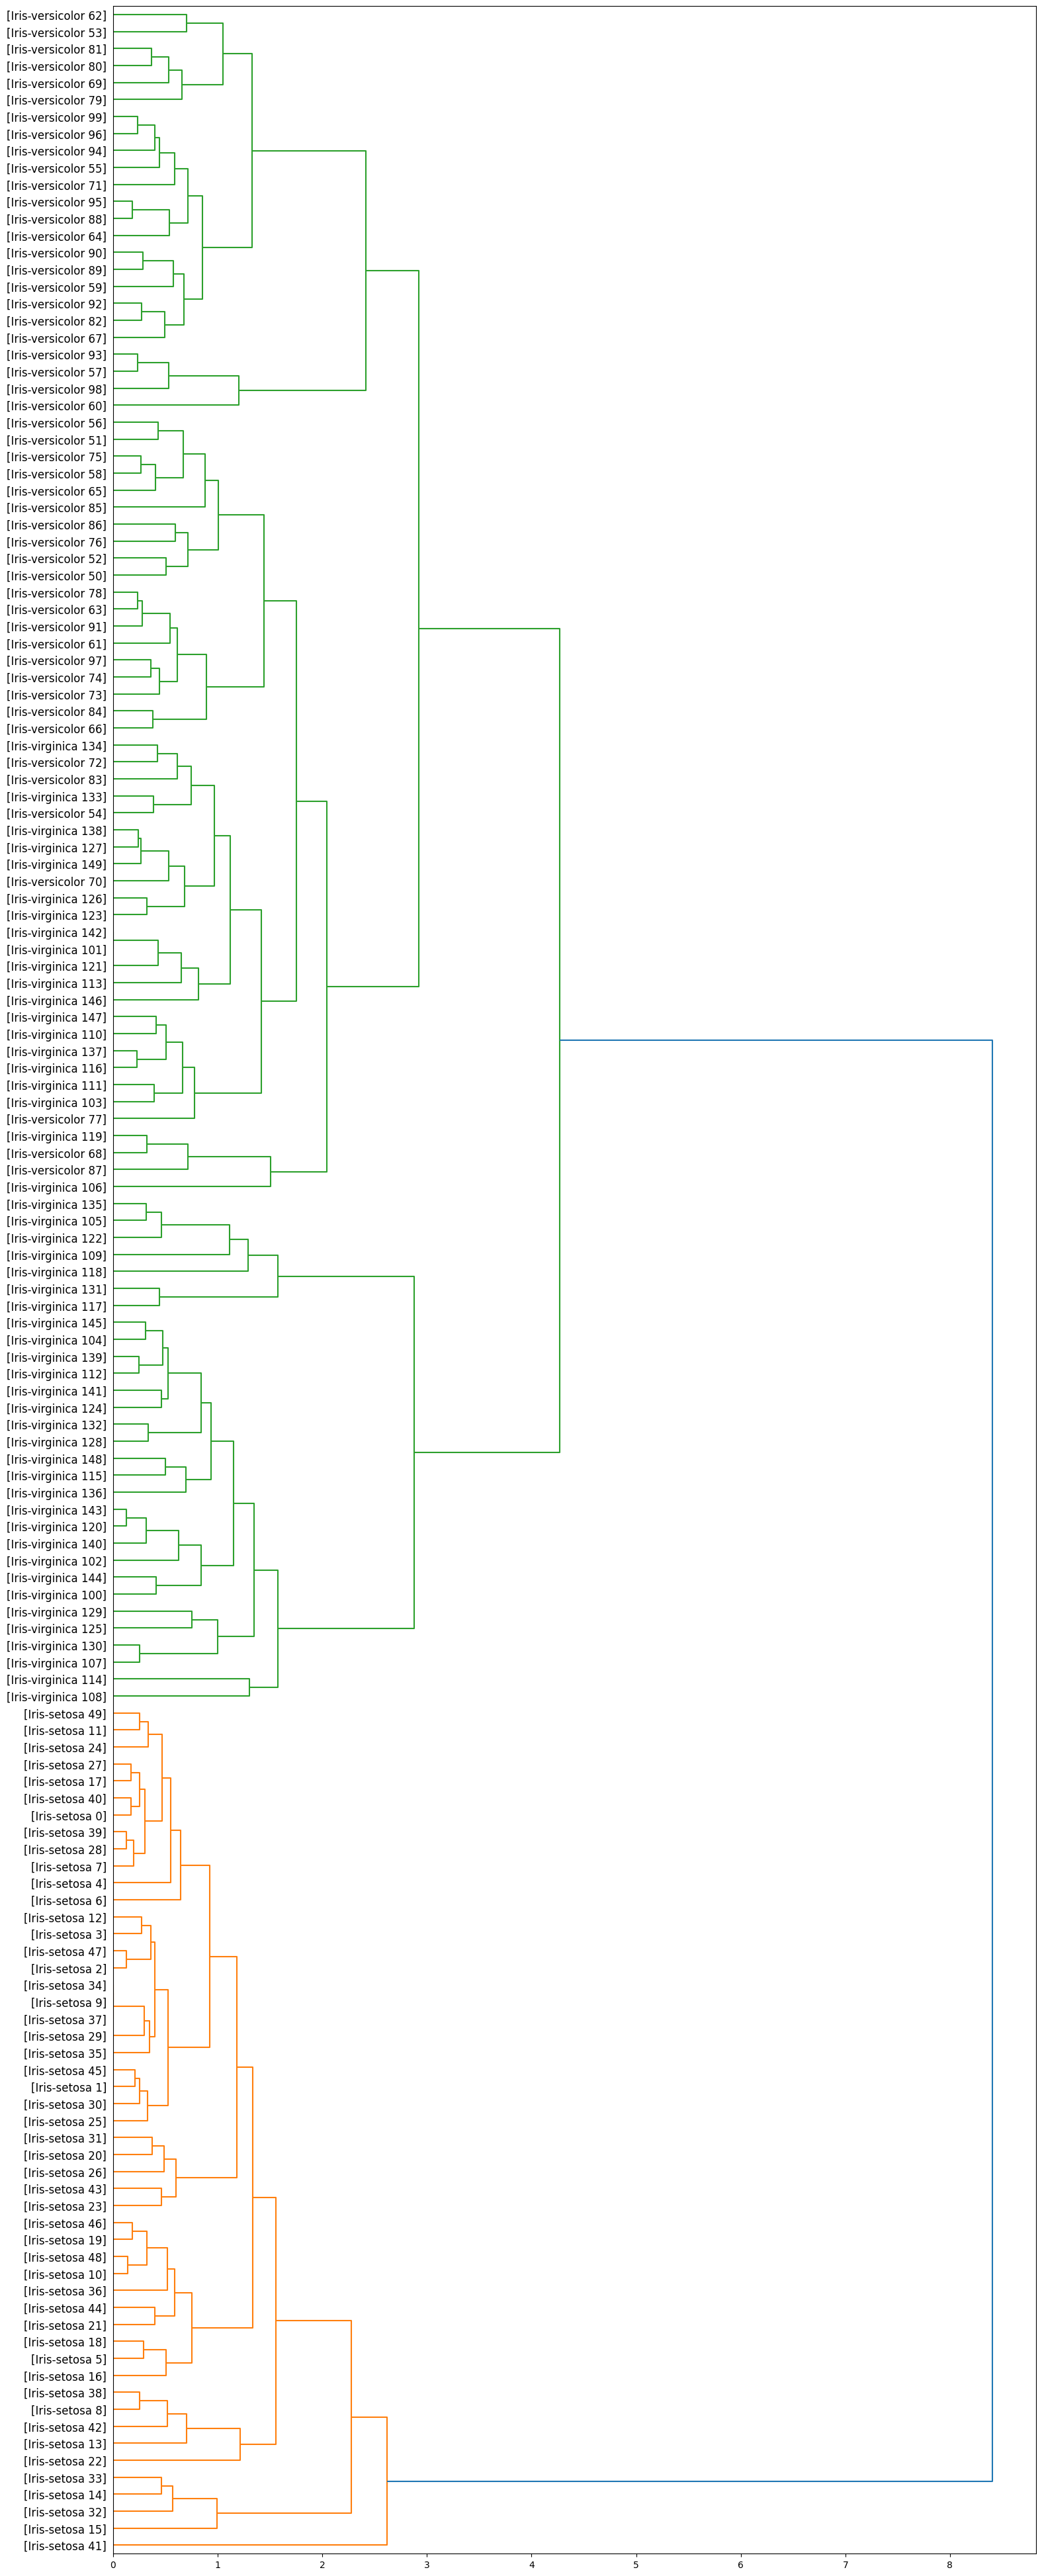

In [55]:
fig = plt.figure(figsize=(18, 50))
def llf(id):
    return '[%s %s]' % (pdf['Class'][id], id)

dendro = hierarchy.dendrogram(Z_average, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')
plt.show()

Penjelasan:


---

Di atas membuat dendrogram dengan average linkage, menampilkan label kelas spesies dan indeks data, kemudian menampilkannya dengan orientasi kanan.

---

In [56]:
dist_matrix = distance_matrix(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


Penjelasan:


---

Di atas menghitung dan mencetak matriks jarak antar pasangan data dalam feature_mtx untuk analisis lebih lanjut.

---

#F. Clustering dengan Scikit-learn

#a. Agglomerative Clustering - Scikit-learn

Single

In [57]:
single = AgglomerativeClustering(n_clusters=6, linkage='single')
single.fit(feature_mtx)
print("Labels dengan Single Linkage (Scikit-learn):")
print(single.labels_)

Labels dengan Single Linkage (Scikit-learn):
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 5 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Penjelasan:


---

Di atas melakukan clustering dengan AgglomerativeClustering menggunakan single linkage untuk membentuk 6 cluster dari data dalam feature_mtx. Setelah proses clustering selesai, label untuk setiap data titik dikelompokkan dalam single.labels_

---

Complete

In [58]:
complete = AgglomerativeClustering(n_clusters=6, linkage='complete')
complete.fit(feature_mtx)
print("\nLabels dengan Complete Linkage (Scikit-learn):")
print(complete.labels_)


Labels dengan Complete Linkage (Scikit-learn):
[2 3 3 3 2 2 2 2 3 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 3 2 2 2 3 2 2
 3 3 2 2 3 3 2 2 3 2 3 2 2 0 0 0 4 0 4 0 4 0 4 4 0 4 0 4 0 4 4 4 4 0 0 0 0
 0 0 0 5 0 4 4 4 4 0 4 0 0 4 4 4 4 0 4 4 4 4 4 0 4 4 5 0 5 5 5 1 4 1 0 1 5
 0 5 0 0 5 5 1 1 4 5 0 1 0 5 1 0 0 5 1 1 1 5 0 0 1 5 5 0 5 5 5 0 5 5 5 0 5
 5 0]


Penjelasan:


---

Di atas melakukan clustering dengan AgglomerativeClustering menggunakan complete linkage untuk membagi data dalam feature_mtx menjadi 6 cluster. Setelah proses clustering selesai, label untuk setiap data titik dikelompokkan dalam complete.labels_ dan hasilnya dicetak.

---

Average

In [59]:
average = AgglomerativeClustering(n_clusters=6, linkage='average')
average.fit(feature_mtx)
print("\nLabels dengan Average Linkage (Scikit-learn):")
print(average.labels_)


Labels dengan Average Linkage (Scikit-learn):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 2 4 1 4 1 1 1 1 2 1 4 5 1
 4 1 4 4 1 1 5 1 4 1 4 1 4 1 1 4 4 1 1 1 5 1 4 4 1 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


Penjelasan:


---

Di atas melakukan clustering dengan AgglomerativeClustering menggunakan average linkage untuk membagi data dalam feature_mtx menjadi 6 cluster. Setelah proses clustering selesai, label untuk setiap titik data dikelompokkan dalam average.labels_ dan hasilnya dicetak.

---

#b. Single-Linkage

In [60]:
pdf['cluster_'] = single.labels_
pdf.head()

sepal-length  sepal-width  petal-length  petal-width        Class  cluster_
0           5.1          3.5           1.4          0.2  Iris-setosa         2
1           4.9          3.0           1.4          0.2  Iris-setosa         2
2           4.7          3.2           1.3          0.2  Iris-setosa         2
3           4.6          3.1           1.5          0.2  Iris-setosa         2
4           5.0          3.6           1.4          0.2  Iris-setosa         2

Penjelasan:


---

Di atas menambahkan label cluster dari single linkage ke DataFrame pdf sebagai kolom cluster_ dan menampilkan 5 baris pertama.

---

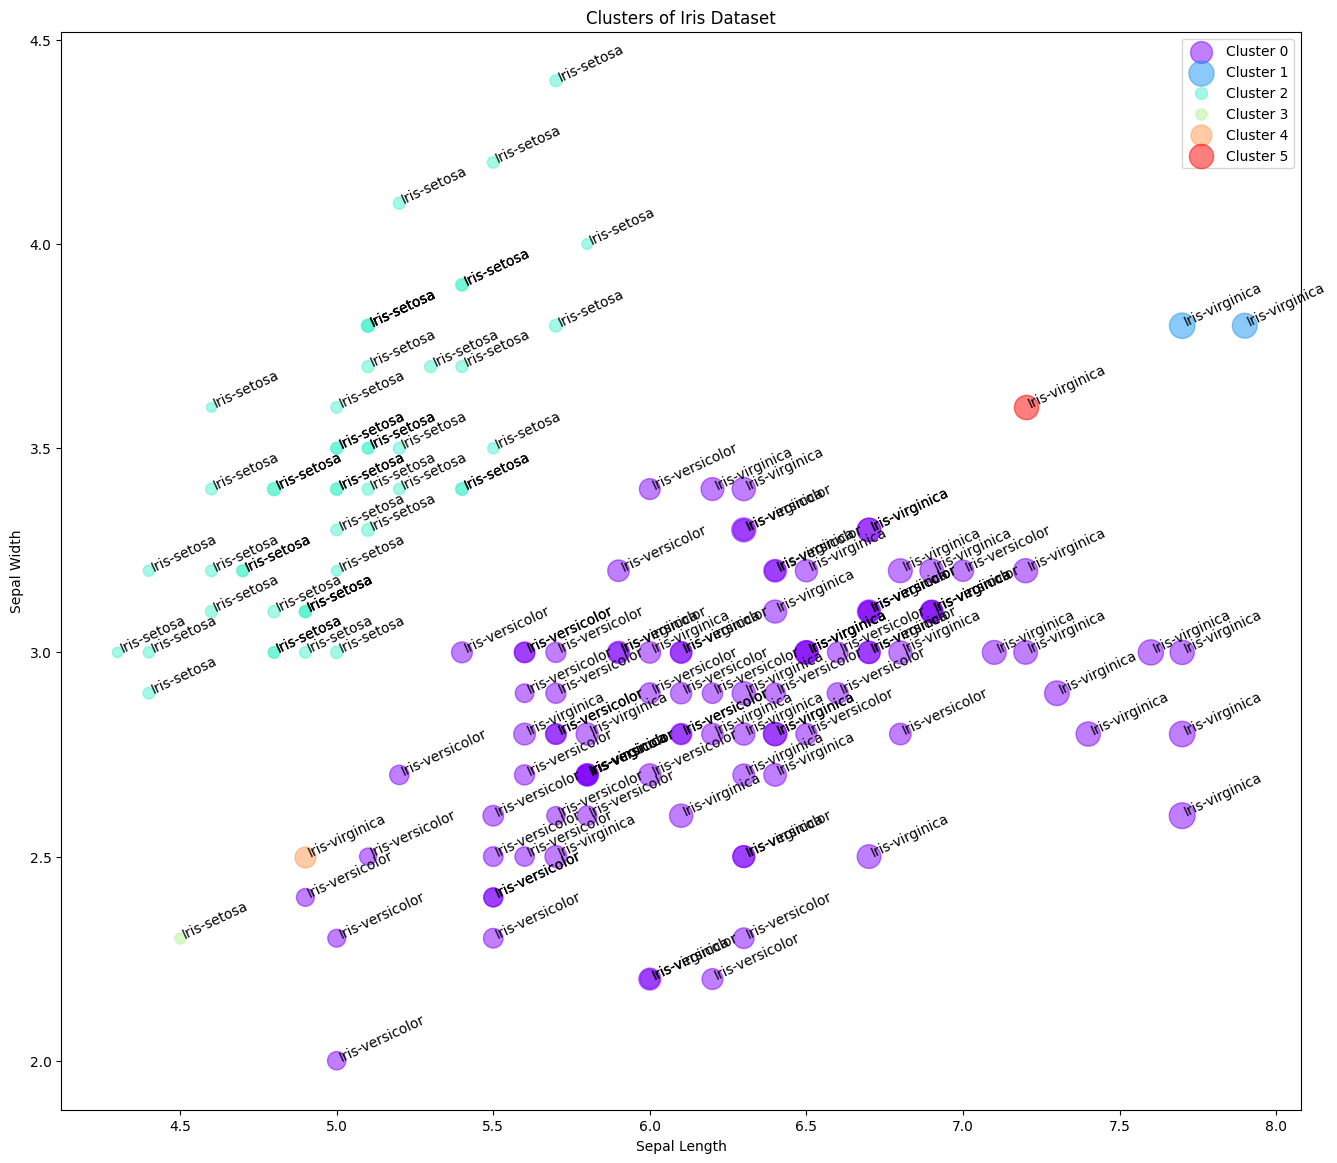

In [61]:
import matplotlib.cm as cm

n_clusters = max(single.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf['cluster_'] == label]
    for i in subset.index:
        plt.text(
            subset['sepal-length'][i],
            subset['sepal-width'][i],
            subset['Class'][i],
            rotation=25
        )
    plt.scatter(
        subset['sepal-length'],
        subset['sepal-width'],
        s=subset['petal-length'] * 50,
        c=[color],
        label='Cluster ' + str(label),
        alpha=0.5
    )

plt.legend()
plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Penjelasan:


---

 Di atas membuat visualisasi scatter plot dari hasil clustering menggunakan single linkage pada dataset Iris. Setiap cluster diberi warna berbeda, dengan ukuran titik yang mewakili panjang petal. Label pada setiap titik menunjukkan kelas spesies, dan plot ini menampilkan sepal length di sumbu X dan sepal width di sumbu Y. Setiap cluster diberi label dan warna berbeda.

---

In [62]:
pdf.groupby(['cluster_', 'Class'])['cluster_'].count()

cluster_  Class          
0         Iris-versicolor    50
          Iris-virginica     46
1         Iris-virginica      2
2         Iris-setosa        49
3         Iris-setosa         1
4         Iris-virginica      1
5         Iris-virginica      1
Name: cluster_, dtype: int64

Penjelasan:


---

Di atas menghitung jumlah data untuk setiap kombinasi cluster dan kelas dalam DataFrame pdf, menunjukkan distribusi kelas di tiap cluster.

---

In [63]:
agg_iris = pdf.groupby(['cluster_', 'Class'])[['sepal-length','sepal-width']].mean()
agg_iris

sepal-length  sepal-width
cluster_ Class                                     
0        Iris-versicolor      5.936000     2.770000
         Iris-virginica       6.558696     2.934783
1        Iris-virginica       7.800000     3.800000
2        Iris-setosa          5.016327     3.440816
3        Iris-setosa          4.500000     2.300000
4        Iris-virginica       4.900000     2.500000
5        Iris-virginica       7.200000     3.600000

Penjelasan:


---

Di atas menghitung rata-rata nilai sepal length dan sepal width untuk setiap kombinasi cluster dan kelas dalam DataFrame pdf. Hasilnya disimpan dalam agg_iris, yang memberikan gambaran tentang rata-rata dimensi sepal untuk setiap cluster berdasarkan spesiesnya.

---

Text(0, 0.5, 'sepal-width')

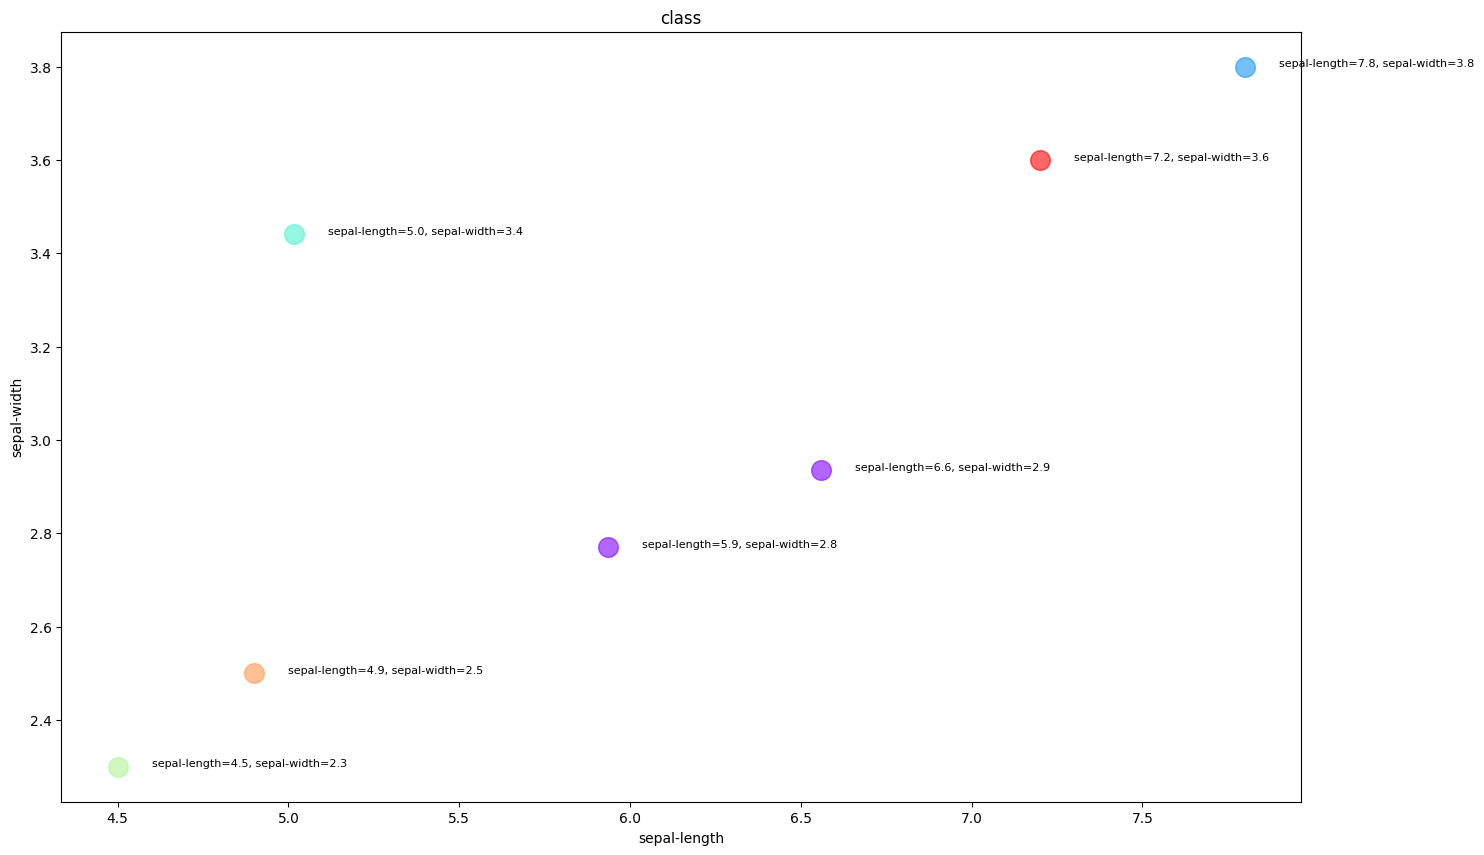

In [64]:
plt.figure(figsize=(16,10))

for color, label in zip(colors, cluster_labels):
    subset = agg_iris.loc[(label,),]

    for i in subset.index:
        plt.text(
            subset.loc[i]['sepal-length'] + 0.1,
            subset.loc[i]['sepal-width'],
            f"sepal-length={subset.loc[i]['sepal-length']:.1f}, sepal-width={subset.loc[i]['sepal-width']:.1f}",
            fontsize=8
        )

    plt.scatter(
        subset['sepal-length'],
        subset['sepal-width'],
        s=200,
        c=[color],
        label=f'Cluster {label}',
        alpha=0.6
    )

plt.title('class')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

Penjelasan:


---

 Di atas membuat visualisasi scatter plot yang menampilkan rata-rata sepal length dan sepal width untuk setiap cluster, dengan label yang menunjukkan nilai-nilai tersebut. Setiap cluster diberi warna berbeda, dan ukuran titik ditetapkan secara tetap. Label pada setiap titik menampilkan nilai sepal length dan width, memberikan gambaran jelas tentang dimensi rata-rata sepal di setiap cluster.

---

#c. Complete-Linkage

In [65]:
pdf['cluster_'] = complete.labels_
pdf.head()

sepal-length  sepal-width  petal-length  petal-width        Class  cluster_
0           5.1          3.5           1.4          0.2  Iris-setosa         2
1           4.9          3.0           1.4          0.2  Iris-setosa         3
2           4.7          3.2           1.3          0.2  Iris-setosa         3
3           4.6          3.1           1.5          0.2  Iris-setosa         3
4           5.0          3.6           1.4          0.2  Iris-setosa         2

Penjelasan:


---

Di atas menambahkan label cluster dari complete linkage ke kolom cluster_ pada DataFrame pdf dan menampilkan 5 baris pertama.

---

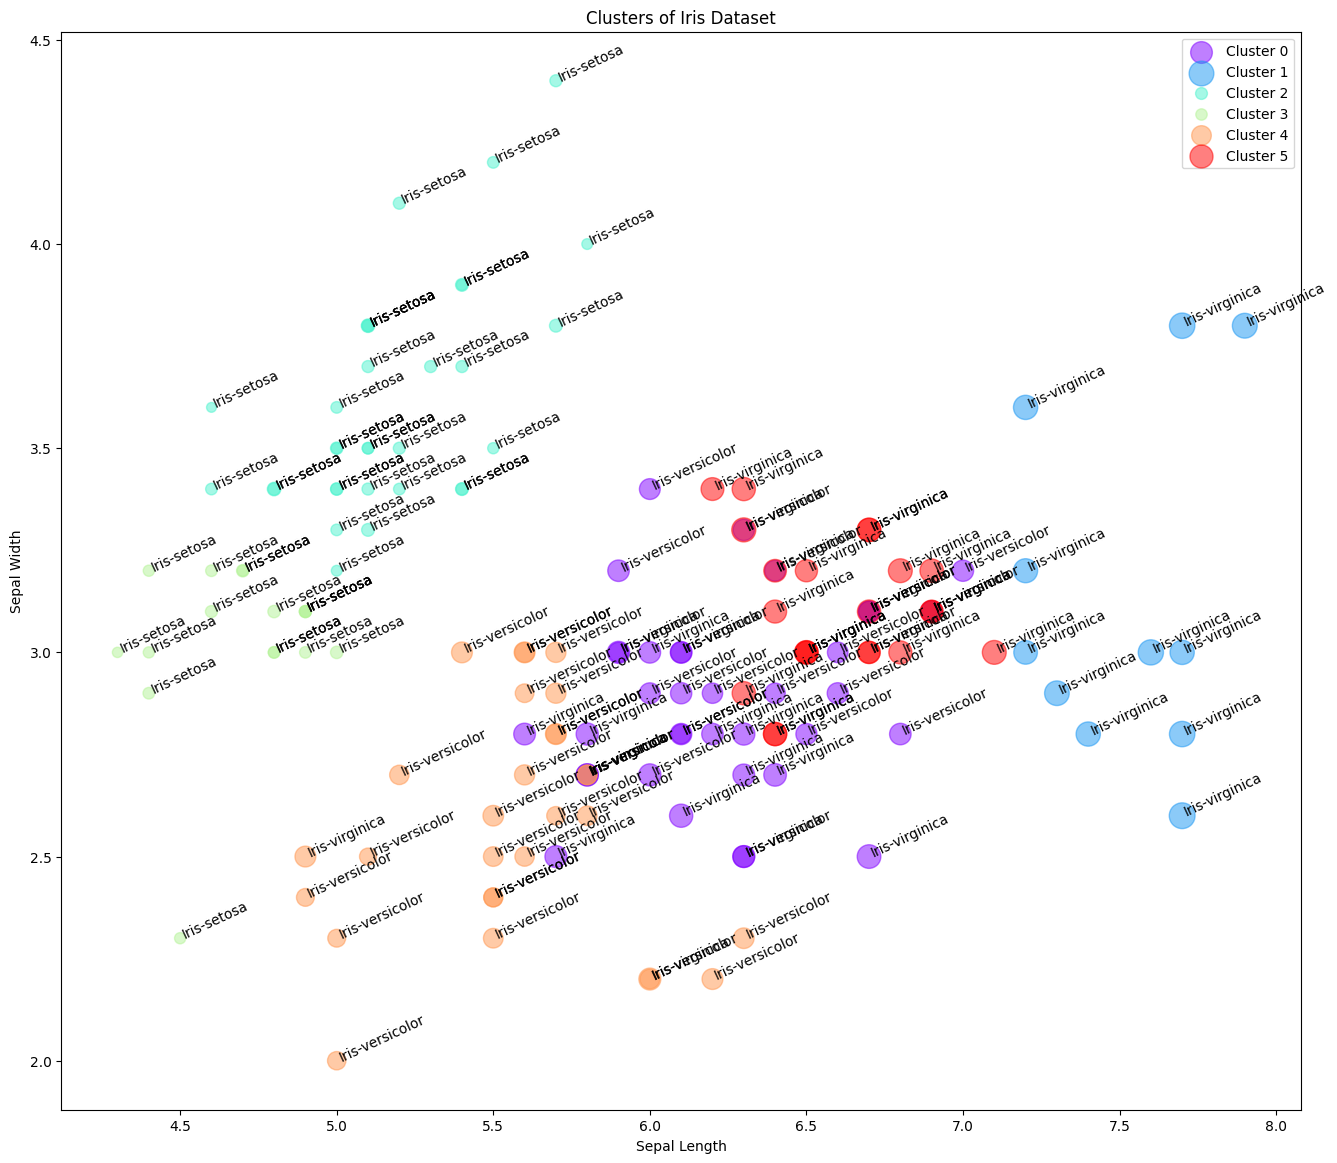

In [66]:
import matplotlib.cm as cm

n_clusters = max(complete.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf['cluster_'] == label]
    for i in subset.index:
        plt.text(
            subset['sepal-length'][i],
            subset['sepal-width'][i],
            subset['Class'][i],
            rotation=25
        )
    plt.scatter(
        subset['sepal-length'],
        subset['sepal-width'],
        s=subset['petal-length'] * 50,
        c=[color],
        label='Cluster ' + str(label),
        alpha=0.5
    )

plt.legend()
plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Penjelasan:


---

 Di atas membuat scatter plot hasil clustering complete linkage pada dataset Iris, menampilkan sepal length dan sepal width dengan ukuran titik berdasarkan petal length dan label spesies.

---

In [67]:
pdf.groupby(['cluster_', 'Class'])['cluster_'].count()

cluster_  Class          
0         Iris-versicolor    22
          Iris-virginica     15
1         Iris-virginica     11
2         Iris-setosa        33
3         Iris-setosa        17
4         Iris-versicolor    27
          Iris-virginica      2
5         Iris-versicolor     1
          Iris-virginica     22
Name: cluster_, dtype: int64

Penjelasan:


---

Di atas menghitung jumlah data per kombinasi cluster dan kelas dalam DataFrame pdf, menunjukkan distribusi kelas di setiap cluster.

---

In [68]:
agg_iris = pdf.groupby(['cluster_', 'Class'])[['sepal-length','sepal-width']].mean()
agg_iris

sepal-length  sepal-width
cluster_ Class                                     
0        Iris-versicolor      6.345455     2.977273
         Iris-virginica       6.066667     2.740000
1        Iris-virginica       7.509091     3.136364
2        Iris-setosa          5.172727     3.618182
3        Iris-setosa          4.682353     3.029412
4        Iris-versicolor      5.574074     2.592593
         Iris-virginica       5.450000     2.350000
5        Iris-versicolor      6.700000     3.000000
         Iris-virginica       6.586364     3.109091

Penjelasan:


---

Di atas menghitung rata-rata sepal length dan sepal width untuk setiap kombinasi cluster dan kelas (Class) dalam dataset pdf. Hasilnya adalah tabel yang menunjukkan nilai rata-rata dua fitur tersebut untuk setiap kelompok data yang terbentuk berdasarkan clustering dan klasifikasi spesies.

---

Text(0, 0.5, 'sepal-width')

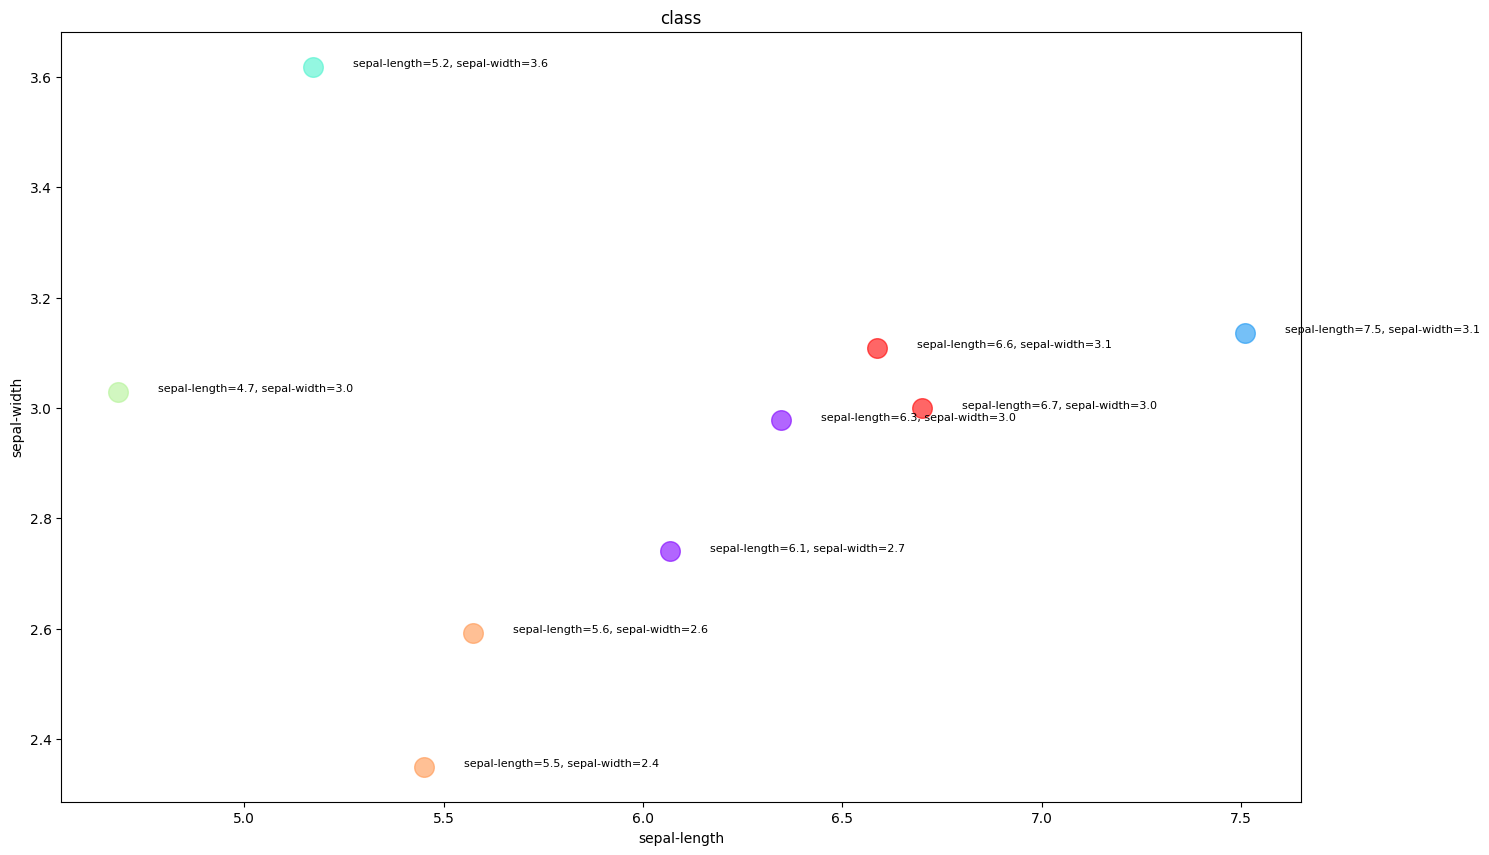

In [69]:
plt.figure(figsize=(16,10))

for color, label in zip(colors, cluster_labels):
    subset = agg_iris.loc[(label,),]

    for i in subset.index:
        plt.text(
            subset.loc[i]['sepal-length'] + 0.1,
            subset.loc[i]['sepal-width'],
            f"sepal-length={subset.loc[i]['sepal-length']:.1f}, sepal-width={subset.loc[i]['sepal-width']:.1f}",
            fontsize=8
        )

    plt.scatter(
        subset['sepal-length'],
        subset['sepal-width'],
        s=200,
        c=[color],
        label=f'Cluster {label}',
        alpha=0.6
    )

plt.title('class')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

Penjelasan:


---

Di atas membuat plot untuk visualisasi clustering berdasarkan sepal length dan sepal width dengan menggunakan warna yang berbeda untuk setiap cluster. Setiap titik mewakili rata-rata nilai sepal length dan sepal width untuk cluster yang bersangkutan, dan informasi terkait ditampilkan dengan teks pada setiap titik.

---

#c. Average-Linkage

In [70]:
pdf['cluster_'] = average.labels_
pdf.head()

sepal-length  sepal-width  petal-length  petal-width        Class  cluster_
0           5.1          3.5           1.4          0.2  Iris-setosa         0
1           4.9          3.0           1.4          0.2  Iris-setosa         0
2           4.7          3.2           1.3          0.2  Iris-setosa         0
3           4.6          3.1           1.5          0.2  Iris-setosa         0
4           5.0          3.6           1.4          0.2  Iris-setosa         0

Penjelasan:


---

Di atas menambahkan label cluster dari metode average linkage ke kolom cluster_ di DataFrame pdf.

---

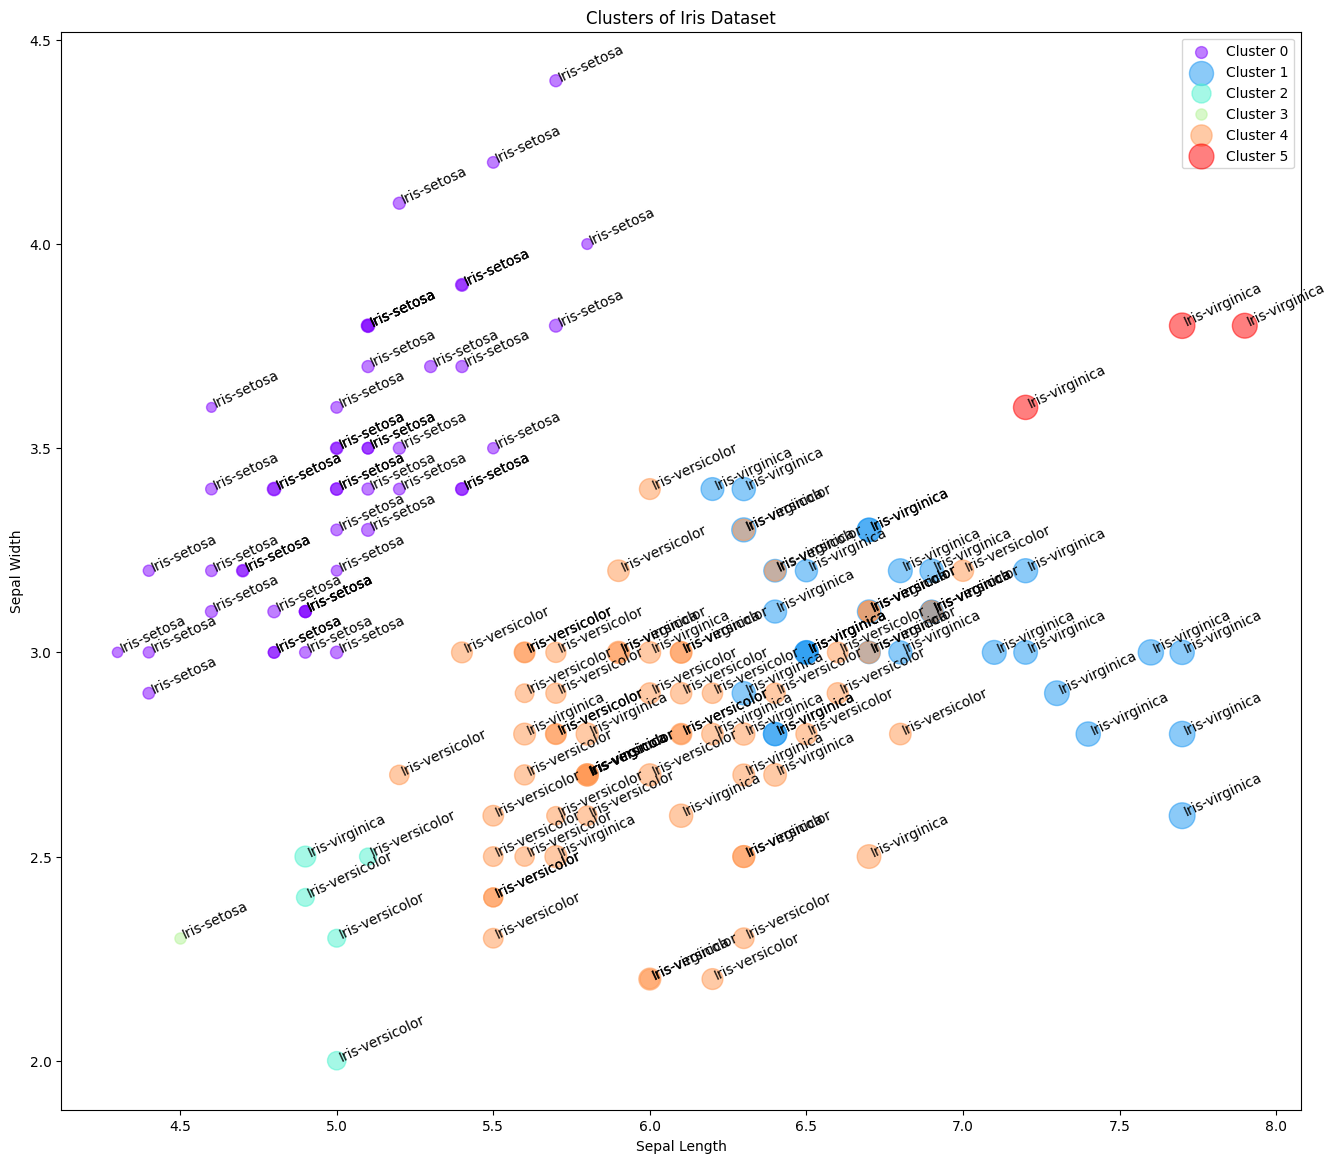

In [71]:
import matplotlib.cm as cm

n_clusters = max(average.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf['cluster_'] == label]
    for i in subset.index:
        plt.text(
            subset['sepal-length'][i],
            subset['sepal-width'][i],
            subset['Class'][i],
            rotation=25
        )
    plt.scatter(
        subset['sepal-length'],
        subset['sepal-width'],
        s=subset['petal-length'] * 50,
        c=[color],
        label='Cluster ' + str(label),
        alpha=0.5
    )

plt.legend()
plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Penjelasan:


---

Di atas menghasilkan scatter plot untuk data Iris, menampilkan panjang dan lebar sepal, dengan ukuran titik berdasarkan panjang petal. Data dikelompokkan menggunakan average linkage, dan setiap cluster diberi warna berbeda. Nama spesies ditampilkan di setiap titik untuk menunjukkan distribusi data dalam setiap cluster.

---

In [72]:
pdf.groupby(['cluster_', 'Class'])['cluster_'].count()

cluster_  Class          
0         Iris-setosa        49
1         Iris-virginica     30
2         Iris-versicolor     4
          Iris-virginica      1
3         Iris-setosa         1
4         Iris-versicolor    46
          Iris-virginica     16
5         Iris-virginica      3
Name: cluster_, dtype: int64

Penjelasan:


---

Di atas menghitung jumlah data untuk setiap kombinasi cluster dan kelas, menunjukkan distribusi spesies dalam setiap cluster.

---

In [73]:
agg_iris = pdf.groupby(['cluster_', 'Class'])[['sepal-length','sepal-width']].mean()
agg_iris

sepal-length  sepal-width
cluster_ Class                                     
0        Iris-setosa          5.016327     3.440816
1        Iris-virginica       6.823333     3.056667
2        Iris-versicolor      5.000000     2.300000
         Iris-virginica       4.900000     2.500000
3        Iris-setosa          4.500000     2.300000
4        Iris-versicolor      6.017391     2.810870
         Iris-virginica       6.062500     2.706250
5        Iris-virginica       7.600000     3.733333

Penjelasan:


---

Di atas mengelompokkan data berdasarkan cluster dan kelas, lalu menghitung rata-rata panjang dan lebar sepal untuk setiap kelompok tersebut, memberikan gambaran mengenai karakteristik masing-masing cluster berdasarkan dua fitur utama pada dataset Iris.

---

Text(0, 0.5, 'sepal-width')

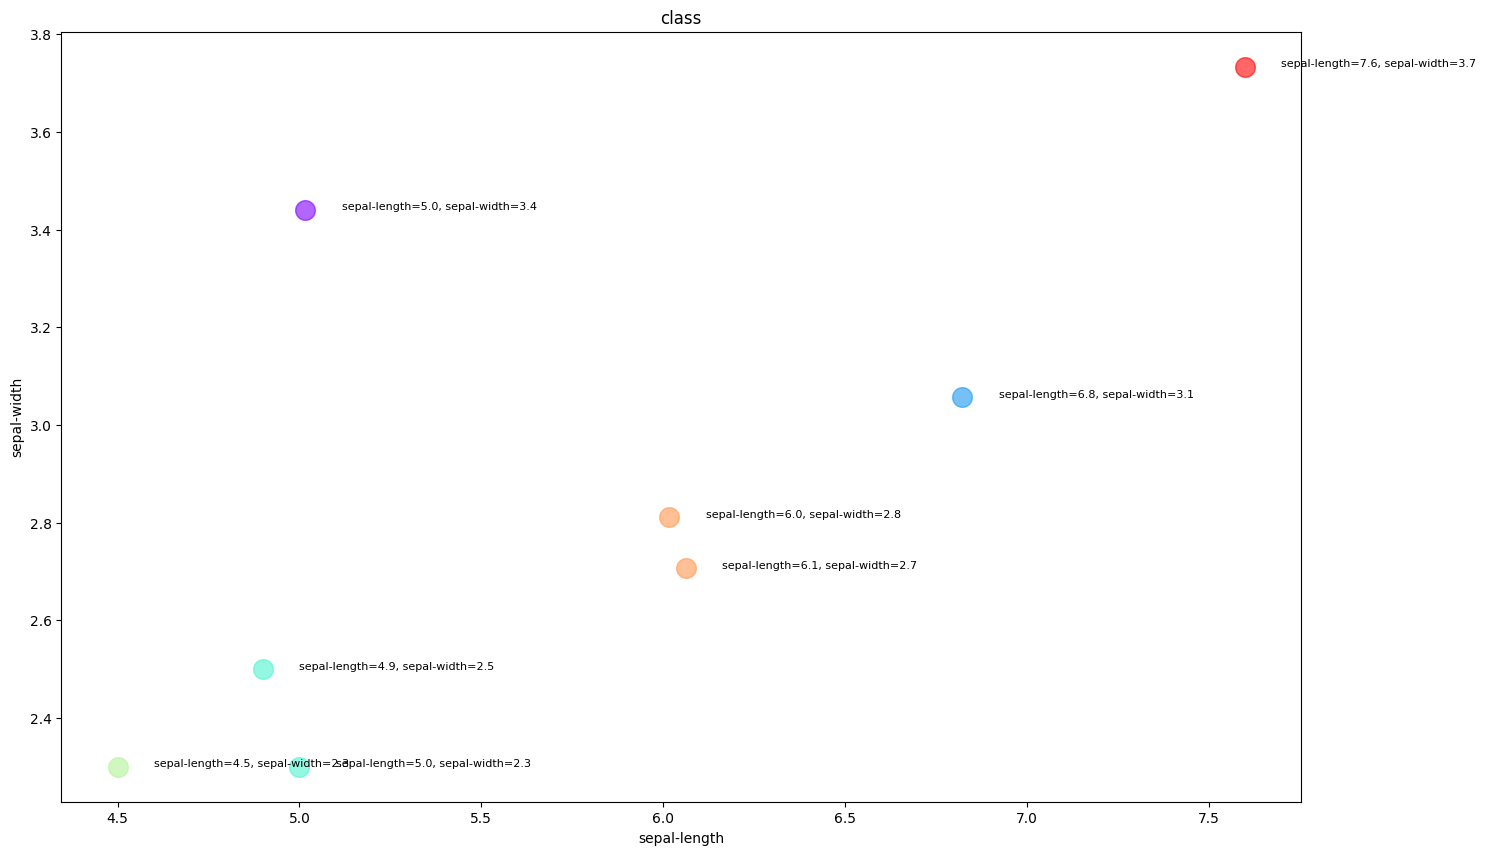

In [74]:
plt.figure(figsize=(16,10))

for color, label in zip(colors, cluster_labels):
    subset = agg_iris.loc[(label,),]

    for i in subset.index:
        plt.text(
            subset.loc[i]['sepal-length'] + 0.1,
            subset.loc[i]['sepal-width'],
            f"sepal-length={subset.loc[i]['sepal-length']:.1f}, sepal-width={subset.loc[i]['sepal-width']:.1f}",
            fontsize=8
        )

    plt.scatter(
        subset['sepal-length'],
        subset['sepal-width'],
        s=200,
        c=[color],
        label=f'Cluster {label}',
        alpha=0.6
    )

plt.title('class')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

Penjelasan:


---

Di atas membuat visualisasi dua dimensi untuk setiap cluster pada dataset Iris, dengan memplot panjang dan lebar sepal. Setiap titik mewakili rata-rata panjang dan lebar sepal untuk setiap cluster, dengan ukuran titik yang konstan. Label yang menunjukkan nilai panjang dan lebar sepal ditambahkan di dekat setiap titik. Warna yang berbeda digunakan untuk setiap cluster.

---

#**PENJELASAN PERBEDAAN**


---

**Single Linkage**

Single Linkage menghitung jarak antar cluster berdasarkan titik paling dekat antara dua cluster yang berbeda. Pada dataset Iris, pendekatan ini sering menghasilkan cluster yang lebih panjang dan terhubung, kadang menyebabkan beberapa data yang berbeda spesiesnya bergabung dalam satu cluster. Sebagai contoh, Versicolor dan Virginica, meskipun secara morfologi sedikit berbeda, cenderung digabungkan dalam satu cluster besar, karena kedekatan antara titik data mereka. Dalam Scipy, metode ini diterapkan dengan scipy.cluster.hierarchy.linkage(method='single'), yang memungkinkan analisis visual dengan dendrogram untuk memantau bagaimana cluster dibentuk. Sementara di Scikit-learn, kita bisa menggunakan AgglomerativeClustering(linkage='single') untuk memberikan label ke dataset tanpa perlu menampilkan dendrogram, dan ini lebih efisien ketika tujuan utamanya adalah pengelompokan otomatis, seperti dalam segmentasi pasar atau analisis pola tanaman dalam dataset Iris.

**Complete Linkage**

Complete Linkage mengukur jarak antar cluster berdasarkan titik terjauh antara dua titik di cluster yang berbeda, menghasilkan pembentukan cluster yang lebih terpisah dan kompak. Pada dataset Iris, metode ini cenderung memisahkan spesies dengan lebih jelas, terutama Setosa, yang sangat berbeda dibandingkan dengan dua spesies lainnya, Versicolor dan Virginica. Dengan pendekatan ini, cluster untuk Setosa akan sangat jelas terpisah dari kedua spesies lainnya. Dalam Scipy, Complete Linkage digunakan dengan method='complete' dalam fungsi linkage(), yang memungkinkan untuk membuat dendrogram yang menggambarkan pembentukan cluster secara jelas. Di sisi lain, Scikit-learn menggunakan AgglomerativeClustering(linkage='complete'), yang memberikan label untuk tiap data tanpa visualisasi dendrogram, berguna dalam kasus seperti pengelompokan spesies Iris.

**Average Linkage**

Average Linkage menghitung jarak antar cluster berdasarkan rata-rata jarak antar semua pasangan titik dari dua cluster yang berbeda. Pendekatan ini menghasilkan pembentukan cluster yang lebih seimbang antara Single dan Complete Linkage. Pada dataset Iris, Setosa tetap terpisah, sedangkan Versicolor dan Virginica cenderung dikelompokkan lebih natural karena adanya beberapa kesamaan dalam karakteristik seperti panjang sepal dan petal. Scipy menggunakan method='average' untuk menghitung dan memvisualisasikan dendrogram, memberikan gambaran yang lebih proporsional tentang bagaimana cluster terbentuk. Di Scikit-learn, metode ini diterapkan dengan AgglomerativeClustering(linkage='average'), yang memungkinkan pengguna untuk mengelompokkan data tanpa visualisasi dendrogram. Metode ini berguna dalam penelitian untuk membandingkan sifat-sifat spesies seperti Versicolor dan Virginica yang memiliki kemiripan dalam ciri mereka, namun tetap ingin dipisahkan dengan jelas dalam cluster.

---



